#  Corporación Favorita Store Sales - Time Series Forecasting

<center>
<img src="https://i.imgur.com/K5wRzy8.jpg" width="1000" height="350">
</center>  


### Problem Statement


> **Goal of the Competition**

>In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer. Specifically, you'll build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores. You'll practice your machine learning skills with an approachable training dataset of dates, store, and item information, promotions, and unit sales.

> **Context**

> Forecasts aren’t just for meteorologists. Governments forecast economic growth. Scientists attempt to predict the future population. And businesses forecast product demand—a common task of professional data scientists. Forecasts are especially relevant to brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers please customers by having just enough of the right products at the right time.

>Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable product marketing.



> **Potential Impact**


> If successful, you'll have flexed some new skills in a real world example. For grocery stores, more accurate forecasting can decrease food waste related to overstocking and improve customer satisfaction. The results of this ongoing competition, over time, might even ensure your local store has exactly what you need the next time you shop.











### Evaluation Metric 

The Submissions for this Kaggle competition are evaluated on the Root Mean Squared Log Error (RMSLE). The RMSLE is calculated as 

![image.png](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.N7JiLFHrOIbgpZbl_rTYXwHaB5%26pid%3DApi&f=1&ipt=ec2cbd80293ebeac78dcef0f203411e2c492317fe4c3a76ad92be5aee9fcad32&ipo=images)


Where:

**n**  is the total number of observations in the (public/private) data set,

**yhati**  is your prediction of target, and

**yi**  is the actual target for  i .

**log(x)**  is the natural logarithm of  x : (loge(x) 

### Data Description

In this competition, you will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.


#### File Descriptions and Data Field Information 

##### **train.csv**

- The training data, comprising time series of features **store_nbr, family,** and **onpromotion** as well as the target **sales**.

- **store_nbr** identifies the store at which the products are sold.
- **family** identifies the type of product sold.
- **sales** gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
- **onpromotion** gives the total number of items in a product family that were being promoted at a store at a given date. 

##### **test.csv**
- The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
- The dates in the test data are for the 15 days after the last date in the training data. 

##### **sample_submission.csv**
- A sample submission file in the correct format.  

##### **stores.csv**
- Store metadata, including city, state, type, and cluster.
- cluster is a grouping of similar stores. 

##### **oil.csv**
- Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.) 

##### **holidays_events.csv**
- Holidays and Events, with metadata
- NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
- Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday). 

##### **Additional Notes**
- Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.


### Data Gathering & Cleaning

Here we are Predicting the store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer using the historical data. Let's start by installing the required packages and Downloading the dataset.

#### Installing and Importing the required packages.



> PIP is the standard package mangement system in Python, below are the packages we need to install for this project.




In [ ]:
!pip install jovian numpy pandas matplotlib==3.1.1 plotly seaborn opendatasets scikit-learn  --upgrade --quiet

     |████████████████████████████████| 68 kB 3.3 MB/s 
     |████████████████████████████████| 13.1 MB 16.2 MB/s 
     |████████████████████████████████| 15.3 MB 51.1 MB/s 
     |████████████████████████████████| 288 kB 40.8 MB/s 


In [ ]:
import jovian
import opendatasets as od
import os
import joblib

import numpy as np
import pandas as pd

import matplotlib
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import missingno as msno


%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000' 

#### Downloading and Loading the Dataset

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/store-sales-time-series-forecasting'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kallurivasanthsai
Your Kaggle Key: ··········


100%|██████████| 21.4M/21.4M [00:00<00:00, 57.1MB/s]



Extracting archive ./store-sales-time-series-forecasting/store-sales-time-series-forecasting.zip to ./store-sales-time-series-forecasting


In [ ]:
os.listdir('store-sales-time-series-forecasting')

['holidays_events.csv',
 'test.csv',
 'transactions.csv',
 'sample_submission.csv',
 'oil.csv',
 'train.csv',
 'stores.csv']

In [ ]:
train_df = pd.read_csv('./store-sales-time-series-forecasting/train.csv',index_col=["id"],parse_dates=["date"])
test_df = pd.read_csv('./store-sales-time-series-forecasting/test.csv',index_col=["id"],parse_dates=["date"])
stores_df = pd.read_csv('./store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('./store-sales-time-series-forecasting/holidays_events.csv',parse_dates=["date"])
transactions_df = pd.read_csv('./store-sales-time-series-forecasting/transactions.csv',parse_dates=["date"])
oil_df = pd.read_csv('./store-sales-time-series-forecasting/oil.csv',parse_dates=["date"])
sample_sub_df = pd.read_csv('./store-sales-time-series-forecasting/sample_submission.csv')

#### Viewing and Initial insights

##### train DF

In [ ]:
train_df.shape

(3000888, 5)

In [ ]:
train_df.head(5)

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 137.4+ MB


In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,3000888.0,27.500000,15.585787,1.0,14.0,27.5,41.00000,54.0
sales,3000888.0,357.775749,1101.997721,0.0,0.0,11.0,195.84725,124717.0
onpromotion,3000888.0,2.602770,12.218882,0.0,0.0,0.0,0.00000,741.0


In [ ]:
train_df.date.min(),train_df.date.max(),train_df.date.max()-train_df.date.min()

(Timestamp('2013-01-01 00:00:00'),
 Timestamp('2017-08-15 00:00:00'),
 Timedelta('1687 days 00:00:00'))

In [ ]:
train_df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [ ]:
train_df.duplicated().sum()

0

In [ ]:
family_dict = {}
for i in list(train_df.family.unique()):
    family_dict[i] =  i.replace(" ","_")
train_df["family"] = train_df["family"].replace(family_dict)
train_df.family.unique()

array(['AUTOMOTIVE', 'BABY_CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN_FOODS', 'GROCERY_I', 'GROCERY_II', 'HARDWARE',
       'HOME_AND_KITCHEN_I', 'HOME_AND_KITCHEN_II', 'HOME_APPLIANCES',
       'HOME_CARE', 'LADIESWEAR', 'LAWN_AND_GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL_CARE',
       'PET_SUPPLIES', 'PLAYERS_AND_ELECTRONICS', 'POULTRY',
       'PREPARED_FOODS', 'PRODUCE', 'SCHOOL_AND_OFFICE_SUPPLIES',
       'SEAFOOD'], dtype=object)

##### test_df 

In [ ]:
test_df.shape

(28512, 4)

In [ ]:
test_df.head()

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 3000888 to 3029399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         28512 non-null  datetime64[ns]
 1   store_nbr    28512 non-null  int64         
 2   family       28512 non-null  object        
 3   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,28512.0,27.500000,15.586057,1.0,14.0,27.5,41.0,54.0
onpromotion,28512.0,6.965383,20.683952,0.0,0.0,0.0,6.0,646.0


In [ ]:
test_df.isnull().sum()

date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [ ]:
test_df.duplicated().sum()

0

In [ ]:
test_df["family"] = test_df["family"].replace(family_dict)
test_df.family.unique()

array(['AUTOMOTIVE', 'BABY_CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN_FOODS', 'GROCERY_I', 'GROCERY_II', 'HARDWARE',
       'HOME_AND_KITCHEN_I', 'HOME_AND_KITCHEN_II', 'HOME_APPLIANCES',
       'HOME_CARE', 'LADIESWEAR', 'LAWN_AND_GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL_CARE',
       'PET_SUPPLIES', 'PLAYERS_AND_ELECTRONICS', 'POULTRY',
       'PREPARED_FOODS', 'PRODUCE', 'SCHOOL_AND_OFFICE_SUPPLIES',
       'SEAFOOD'], dtype=object)

##### Stores_df

In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [ ]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
stores_df.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [ ]:
stores_df.duplicated().sum()

0

In [ ]:
stores_df.rename(columns={"type":"store_type"},inplace=True)

##### oil_df

In [ ]:
oil_df.shape

(1218, 2)

In [ ]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [ ]:
oil_df.describe().T

,count,mean,std,min,25%,50%,75%,max
dcoilwtico,1175.0,67.714366,25.630476,26.19,46.405,53.19,95.66,110.62


In [ ]:
oil_df.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

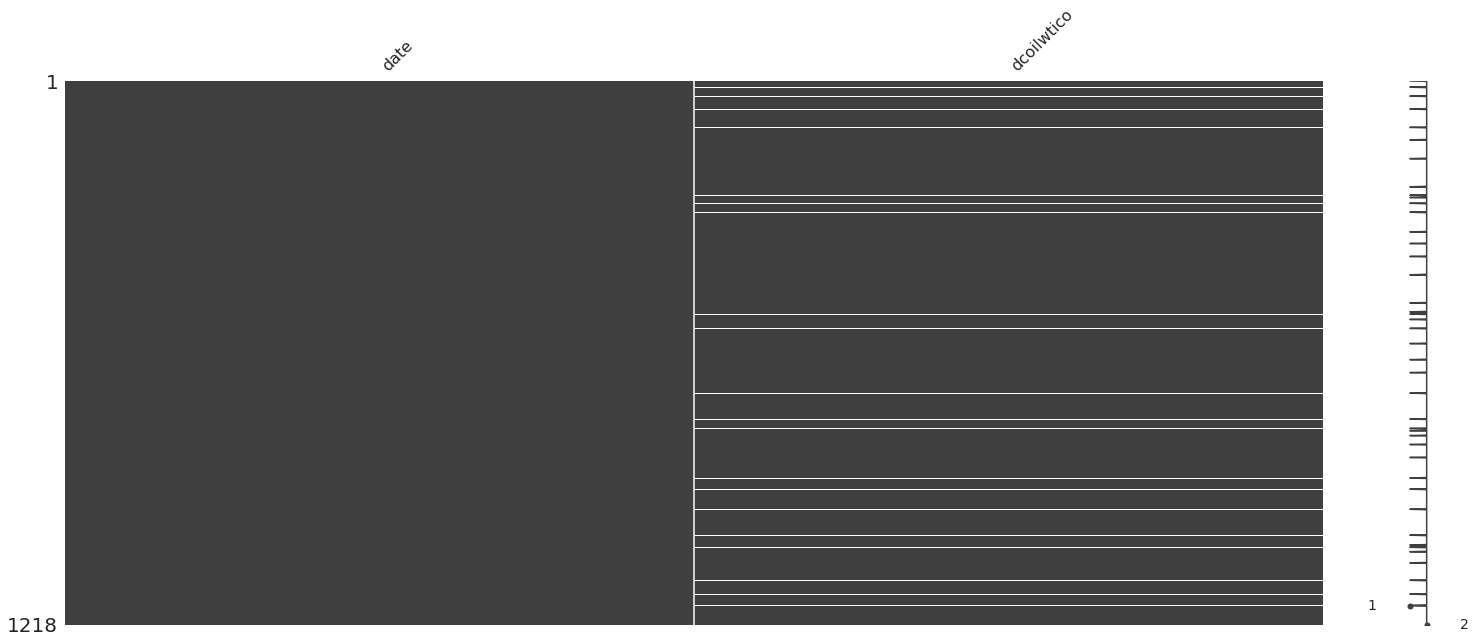

In [ ]:
msno.matrix(oil_df);

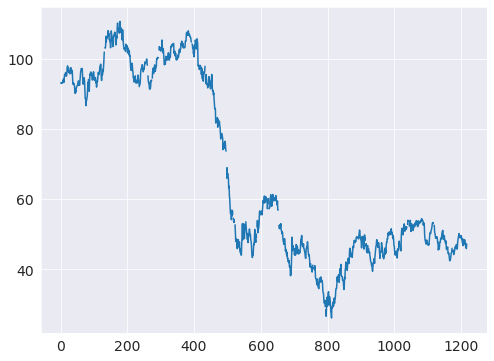

In [ ]:
oil_df.dcoilwtico.plot()

In [ ]:
oil_df["dcoilwtico"].interpolate(method='linear',inplace=True)

In [ ]:
oil_df.loc[0,"dcoilwtico"] = 93

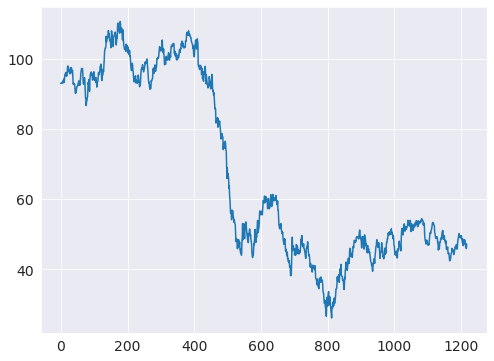

In [ ]:
oil_df.dcoilwtico.plot()

In [ ]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1218 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [ ]:
pd.infer_freq(oil_df["date"])

'B'

In [ ]:
oil_df["date"].min(),oil_df["date"].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

##### transactions_df

In [ ]:
transactions_df.shape

(83488, 3)

In [ ]:
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [ ]:
transactions_df.describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,83488.0,26.939237,15.608204,1.0,13.0,27.0,40.0,54.0
transactions,83488.0,1694.602158,963.286644,5.0,1046.0,1393.0,2079.0,8359.0


In [ ]:
transactions_df.duplicated().sum()

0

In [ ]:
transactions_df["date"].min(),transactions_df["date"].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

##### holidays_df

In [ ]:
holidays_df.shape

(350, 6)

In [ ]:
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [ ]:
holidays_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25 00:00:00,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338
first,2012-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2017-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
holidays_df.rename(columns={"locale_name":"city","type":"holiday_type"},inplace=True)

In [ ]:
holidays_df.drop(columns="description", inplace=True)

In [ ]:
holidays_df.holiday_type.value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: holiday_type, dtype: int64

As we have to predict the sales column we will also check for any sales values that could be false

In [ ]:
### Will Check sales is less than 0 for any day
negative_sale_filt = train_df['sales'] < 0
train_df[negative_sale_filt]

,date,store_nbr,family,sales,onpromotion
id,,,,,


## Exploratory Data Analysis

- Let's Explore each dataset in depth and combine required fetaures to train df

#### stores_df 

> Basic KPI of Stores dataset

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['KPI', 'Value']),
                 cells=dict(values=[['Number of Stores', 'Number of Store Types', 
                                     'Total Number of cities', 'Total Number of States',
                                    'No of clusters'], 
                                    [len(stores_df.index.values), stores_df['store_type'].nunique(), 
                                    stores_df['city'].nunique(), stores_df['state'].nunique(),
                                    stores_df['cluster'].nunique()]]))
                     ])

fig.update_layout({"title": f'BASIC KPIS of STORE DATA'}, height=305)
fig.show();

**Insights**

- There are 54 different stores which are located in 22 different cities in 16 states. 
- These 54 stores are divided in to 5 Types and 17 clusters.



> Distribution of Store by City and State



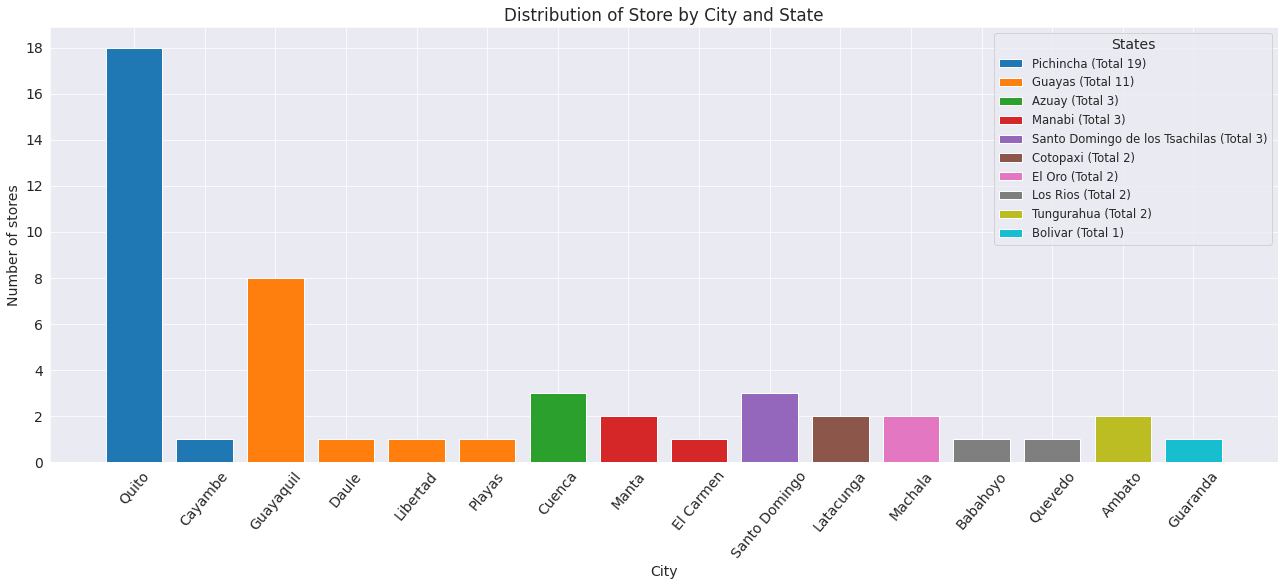

In [ ]:
### Getting the top states based on the no of stores
top_state = stores_df.groupby('state').size().sort_values(ascending=False)
states = top_state.index.values
stores_df_grouped = stores_df.groupby(['state','city']).agg({'city':'count'})
stores_df_grouped.rename(columns={"city":"No_of_stores"},inplace=True)
                                                            
fig, ax = plt.subplots( figsize=(22,8))
custom_legend = []
for i in range(0,10):
    cities = stores_df_grouped.loc[states[i]].sort_values(by="No_of_stores",ascending=False)
    ax.bar(cities.index.values, cities.values.flatten())
    custom_legend.append( states[i] + " (Total {})".format(top_state[i]))

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Distribution of Store by City and State")
ax.set_ylabel("Number of stores")
ax.set_xlabel("City")
ax.legend(custom_legend, fontsize="small", title = "States")

plt.xticks(rotation = 50)
plt.show();

**Insights**

- Pichincha	has the highest number of stores(**Quito :- 18**,  **Cayambe:-  1**)

- Only 5 States have more than 2 stores. out of 16 states 7 of them have only 1 store in the entire state. 

> Distribution of Store by StoreType and cluster.

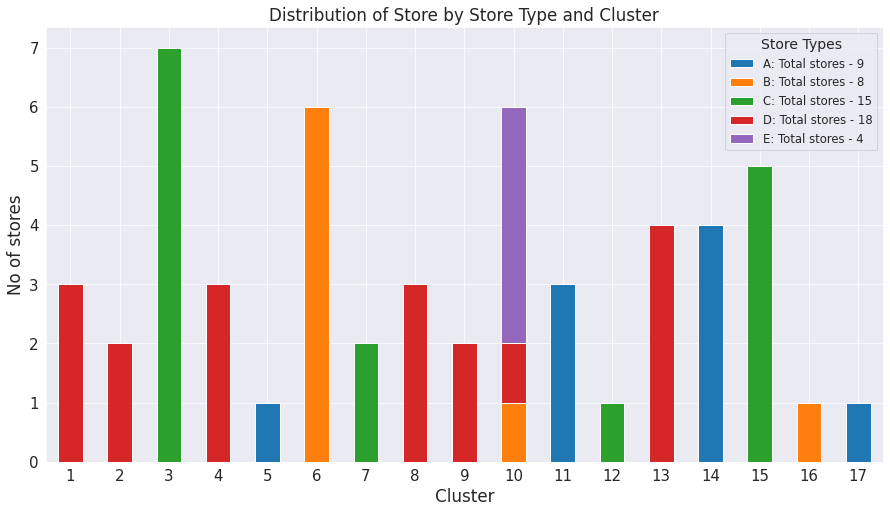

In [ ]:
store_type_group = stores_df.groupby(by=["cluster","store_type"]).agg({"store_nbr":"count"})
store_type_group.reset_index(inplace=True)
store_type_group.rename(columns={"store_nbr" : "No_of_stores"},inplace=True)
pivot_store = pd.pivot_table(store_type_group,index=["cluster"],values=["No_of_stores"],columns=["store_type"],aggfunc=np.sum).fillna(0).astype(np.int32)

fig, ax = plt.subplots(figsize=(15,8))
pivot_store.plot(kind="bar",stacked=True,ax=ax)
ax.set_xlabel("Cluster",fontsize="large")
ax.set_ylabel("No of stores",fontsize="large")
ax.tick_params(labelsize=15,labelrotation=0)
ax.set_title("Distribution of Store by Store Type and Cluster")
store_type= stores_df.groupby(by=["store_type"]).agg({"store_nbr":"count"})
custom_legend = []
for i in list(store_type.index):
    string = i + ": Total stores - " + str(store_type.loc[i].values[0])
    custom_legend.append(string)
ax.legend(custom_legend, fontsize="small", title = "Store Types")
fig.show();

**Insights**

- There are 5 types of stores which are again distributed among 17 clusters. 
- cluster 3 has the highest number of stores followed by cluster 6 and 10
- Store type D has the higher number of stores.

> Daily Average Sales by All Stores

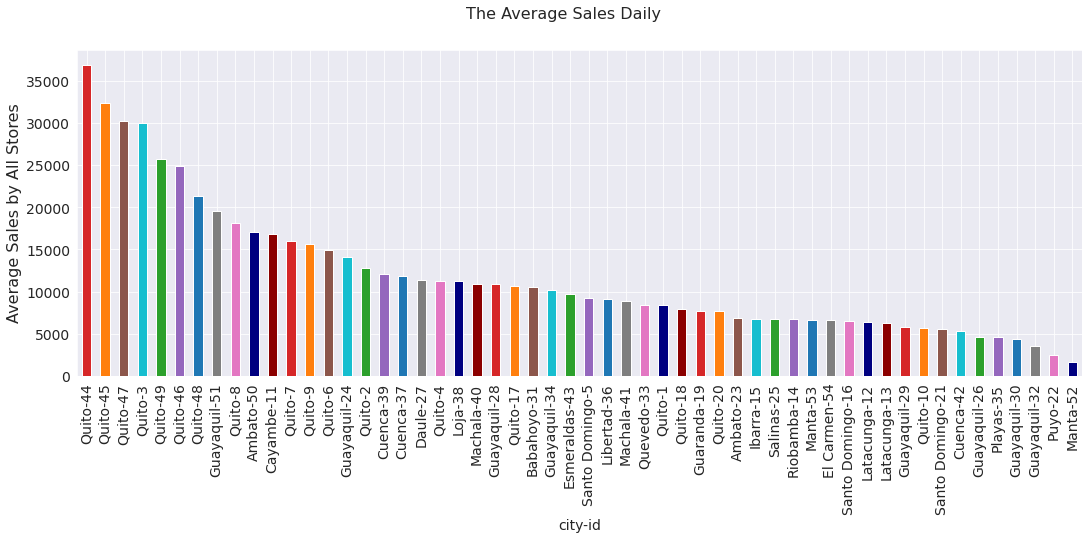

In [ ]:
stores_df.set_index("store_nbr",inplace=True)
store_nbr_id  = stores_df.index.values
sales_grouped = train_df.groupby(['store_nbr','date']).agg({'sales':'sum'})
sales_by_store_id = {}
for store in store_nbr_id:
    sales_by_store_id[store] = {'sale': sales_grouped.loc[store].sales.mean(),
                                'city': stores_df.city[store] ,
                                'city-id': stores_df.city[store]+"-{}".format(store) ,
                                'state': stores_df.state[store] ,
                                'store_type': stores_df.store_type[store] ,
                                'cluster': stores_df.cluster[store]}
sales_by_store_id = pd.DataFrame.from_dict(sales_by_store_id, orient='index') # convert to Pandas DataFrame 

# Sorting 
sales_by_store_id.sort_values( by='sale', inplace=True, ascending=False )

# Ploting
figsize = (18,6)
fig, ax1 = plt.subplots(figsize=figsize)
color = ["tab:red","tab:orange","tab:brown","tab:cyan","tab:green","tab:purple","tab:blue","tab:gray","tab:pink", "navy","darkred"]
sales_by_store_id.plot(kind="bar",
                       x='city-id',
                       y='sale',
                       ax=ax1,color=color, 
                       legend=False)
plt.suptitle("The Average Sales Daily",  fontsize=16, ha='center')
ax1.set_ylabel('Average Sales by All Stores',  fontsize=16);

**Insights**

- The 54 stores are located in different states and cities. The Average Daily sales of these 54 stores are very different from one another. The stores in the Quito city are having high Avg daily sales than all other stores.
- The Average sales of some of the stores are very less compared to the stores in the Quito city.

>  Distribution of Sales by city

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



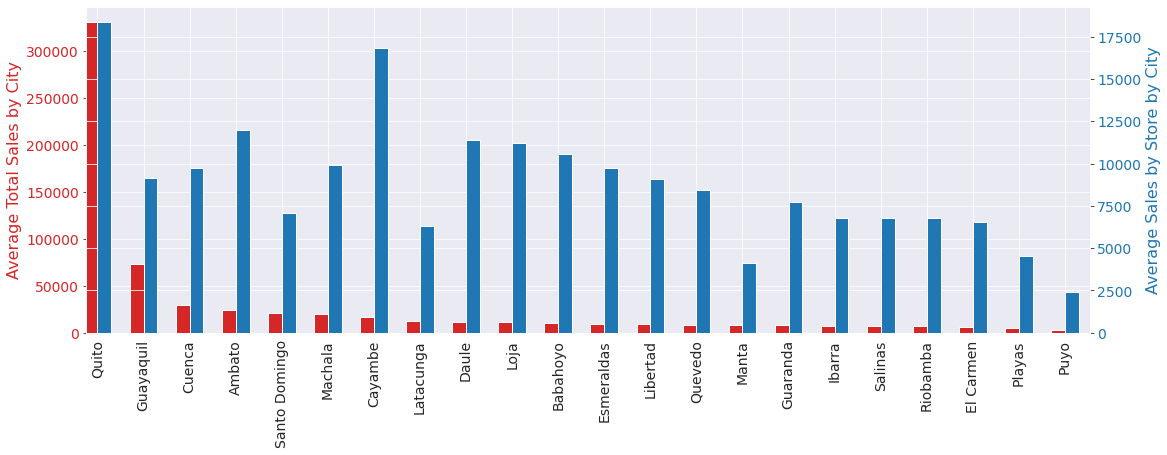

In [ ]:
top_city  = stores_df.groupby('city') .size().sort_values(ascending=False)
sales_by_city      = {}
for city in top_city.index.values:
    sales_by_city[city] = {'sum': sales_by_store_id [ stores_df.city==city ].sale.sum(),
                           'mean': sales_by_store_id [ stores_df.city==city ].sale.mean()}
sales_by_city      = pd.DataFrame.from_dict(sales_by_city, orient='index') 
sales_by_city_sum  = sales_by_city.sort_values( by='sum', ascending=False )

color1 = "tab:red"
color2 = "tab:blue"
fig, ax1 = plt.subplots(figsize=figsize)
sales_by_city_sum.plot(kind="bar",y='sum', 
                       figsize=figsize,
                       ax=ax1,
                       color=color1, 
                       align='edge', 
                       width=-0.3, 
                       legend=False)
ax2 = ax1.twinx()
sales_by_city_sum.plot(kind="bar",
                       y='mean',
                       figsize=figsize,
                       ax=ax2,color=color2, 
                       align='edge', width=0.3,  legend=False)

ax1.set_ylabel('Average Total Sales by City', color=color1, fontsize=16)
ax1.tick_params(axis='y', labelcolor=color1)
ax2.set_ylabel('Average Sales by Store by City', color=color2, fontsize=16)  
ax2.tick_params(axis='y', labelcolor=color2)
plt.show();

**Insights**

- From the above graph it is clear that Quito has the biggest daily-average sales both per city and per store, followed by cayamble which has only one store. 

> Top Sales by Type and Cluster Year wise

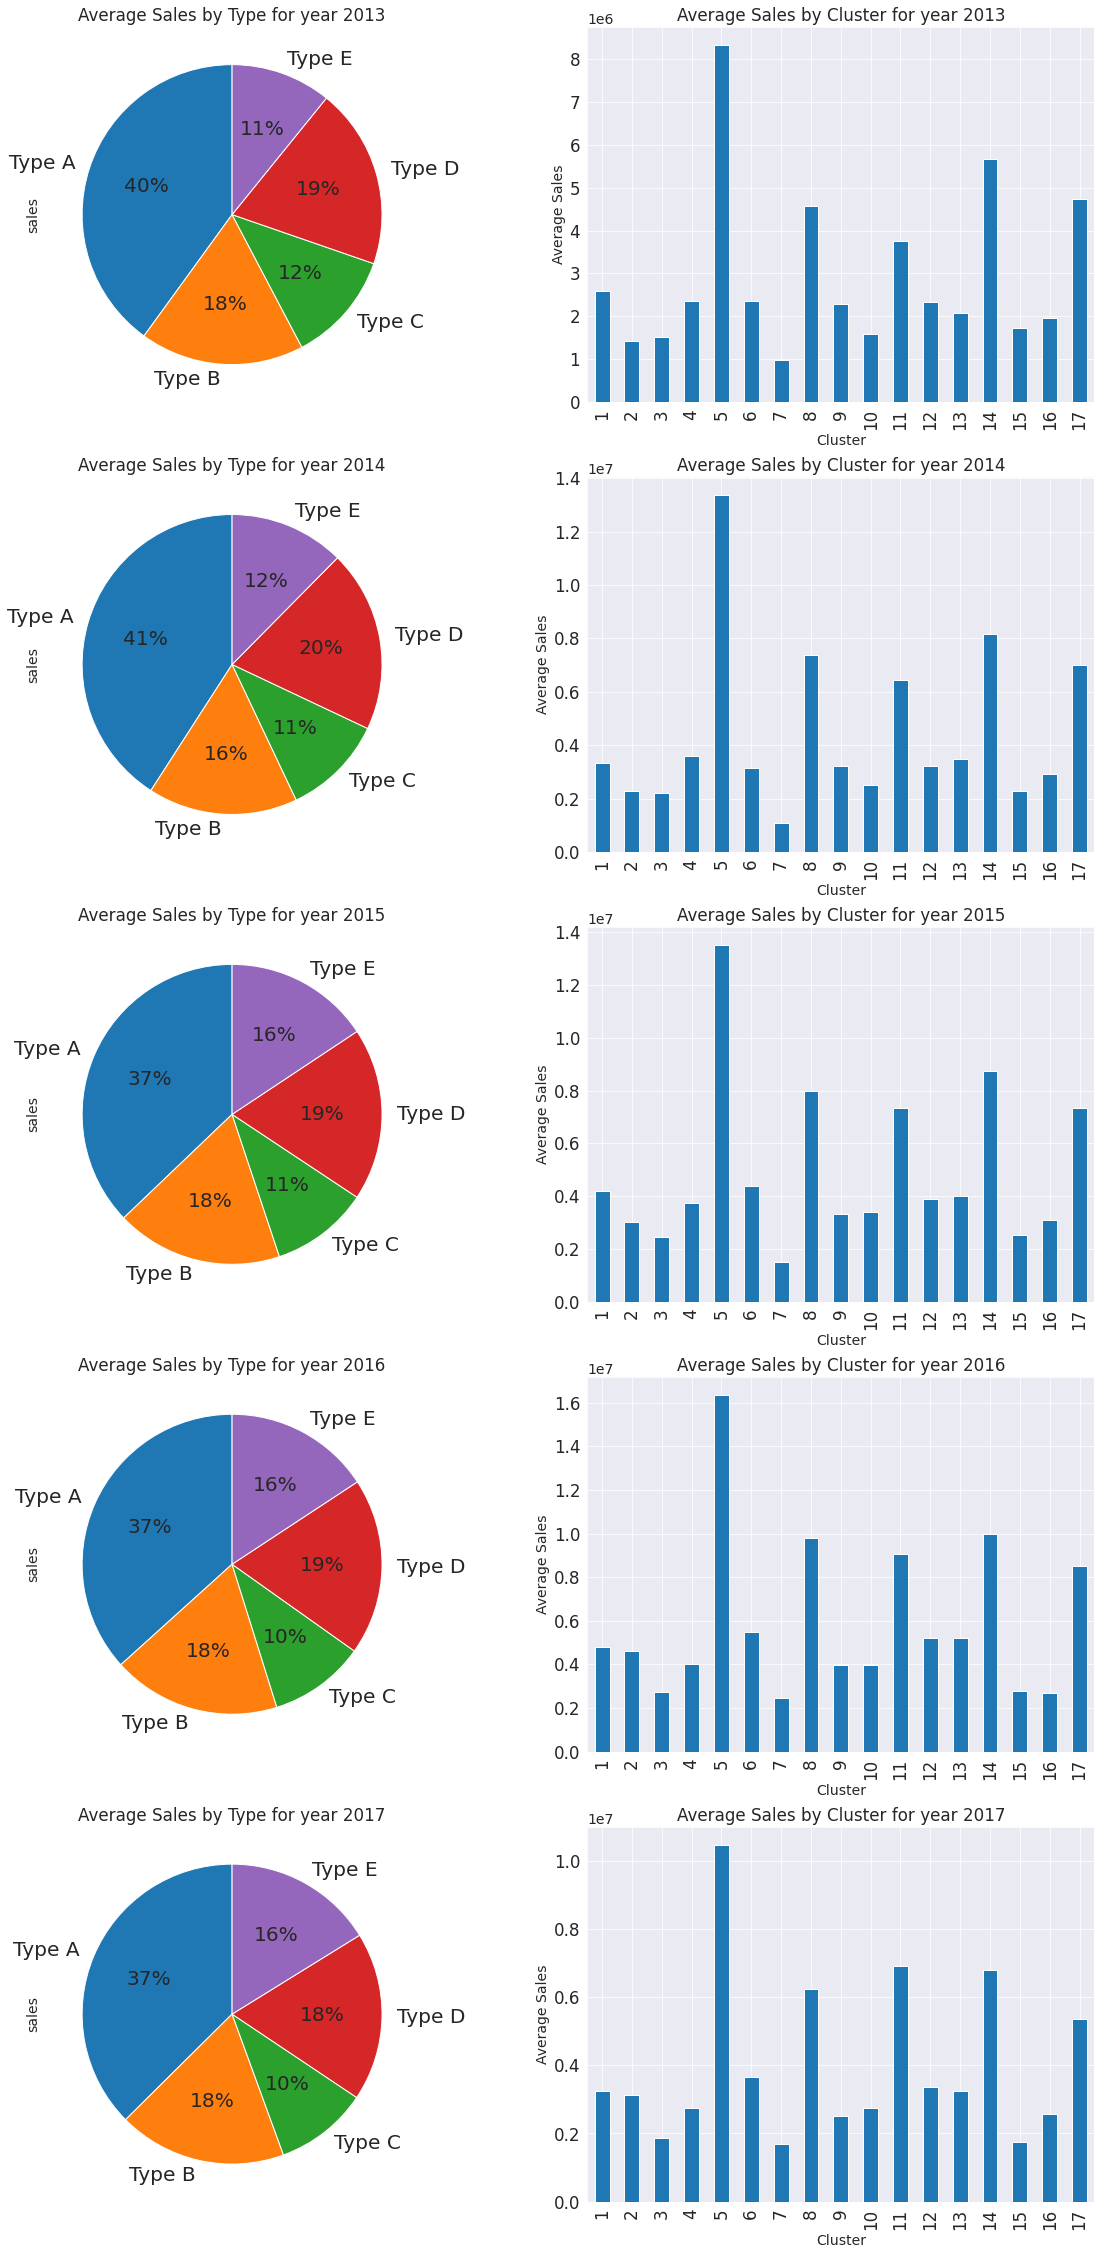

In [ ]:
train_df["year"] = train_df.date.dt.year
years = list(train_df.date.dt.year.unique())

figsize = (20,len(years)*8)
fig, axes = plt.subplots(nrows=len(years),ncols=2,figsize=figsize)

axis_tuple = list((i,j) for i in range(len(years)) for j in range(2))
year_tuple_dict = { years[i//2]:[axis_tuple[i],axis_tuple[i+1]] for i in range(0,2*len(years),2)}

for year in years:
    ax1, ax2 = axes[year_tuple_dict[year][0]],axes[year_tuple_dict[year][1]]
    year_data = train_df.loc[train_df.date.dt.year==year].groupby("store_nbr").agg({"sales":"sum"})
    year_data = pd.merge(year_data, stores_df, on="store_nbr").drop(["city","state"],axis=1)
    year_data.groupby(['store_type']).agg({'sales':'mean'}).plot.pie(y="sales",ax=ax1, legend=False, autopct='%1.f%%',
                             startangle=90, labels=["Type A","Type B","Type C","Type D","Type E"], fontsize="x-large")
    ax1.set(title=f"Average Sales by Type for year {year}")
    year_data.groupby(['cluster']).agg({'sales':'mean'}).plot.bar(ax=ax2,  fontsize="large")
    ax2.set(title=f"Average Sales by Cluster for year {year}")
    ax2.set(ylabel="Average Sales", xlabel="Cluster")
    ax2.get_legend().remove()
plt.show();    


**Insights**

- Store Type A has the highest sales which is around 37%, followed by Types B and D from 2013 to 2016. 
- Store Cluster 5 has the highest sales, followed by Clusters 11, 14, and 8 from 2013 to 2016. 

> Average Sales by Month & Quarter

In [ ]:
sales_grouped  = train_df.groupby('date').agg({'sales':'sum'}).to_period("D")
sales_grouped['year']      = sales_grouped.index.year # year
sales_grouped['quarter']   = sales_grouped.index.quarter # Quarter 1 to 4
sales_grouped['month']     = sales_grouped.index.month # Month 1 to 12
sales_grouped['week']      = sales_grouped.index.week #  1 to 52
sales_grouped['dayofweek'] = sales_grouped.index.dayofweek  # Monday=0, Sunday=6
sales_grouped['dayofmonth']= sales_grouped.index.day  # day in month from 01 to 31
sales_grouped['dayofyear'] = sales_grouped.index.dayofyear # 1 to 365  or 366

,sales,year,quarter,month,week,dayofweek,dayofmonth,dayofyear
date,,,,,,,,
2013-01-01,2511.618999,2013,1,1,1,1,1,1
2013-01-02,496092.417944,2013,1,1,1,2,2,2
2013-01-03,361461.231124,2013,1,1,1,3,3,3
2013-01-04,354459.677093,2013,1,1,1,4,4,4
2013-01-05,477350.121229,2013,1,1,1,5,5,5
...,...,...,...,...,...,...,...,...
2017-08-11,826373.722022,2017,3,8,32,4,11,223
2017-08-12,792630.535079,2017,3,8,32,5,12,224
2017-08-13,865639.677471,2017,3,8,32,6,13,225


### Sales

In [ ]:
sales_smooth7  = sales_grouped.copy()
sales_smooth30 = sales_grouped.copy()
sales_smooth365= sales_grouped.copy()

sales_smooth7["sales"]   = sales_smooth7.  sales.rolling(window=7,  center=True, min_periods=3 ).mean()
sales_smooth30["sales"]  = sales_smooth30. sales.rolling(window=30, center=True, min_periods=15).mean()
sales_smooth365["sales"] = sales_smooth365.sales.rolling(window=365,center=True, min_periods=183).mean()

- The distribution of sales

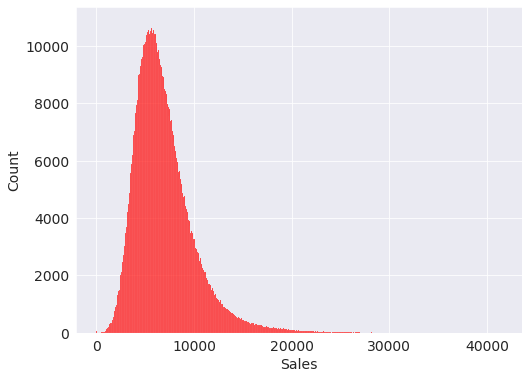

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(merged_df["Sales"], color='r');

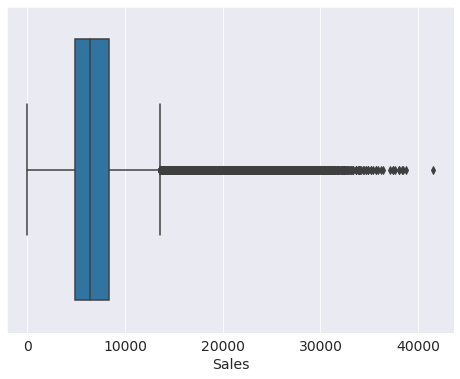

In [ ]:
# Checking outliers in Sales
sns.boxplot(x=merged_df['Sales']);

- We do not have any misleading values in this dataset. i.e. No negative sales or sale when store was closed.
- There are Many outliers on right side in above plot. So might be those stores are having high sales. But will remove still those with very high sales.
- As the store Id is categorical it is important to know the importance of store id while predicting the Sales, The Avg sales would give the some weight to the stores instead of store id, we can add a feature of average sales per day.

### Customers

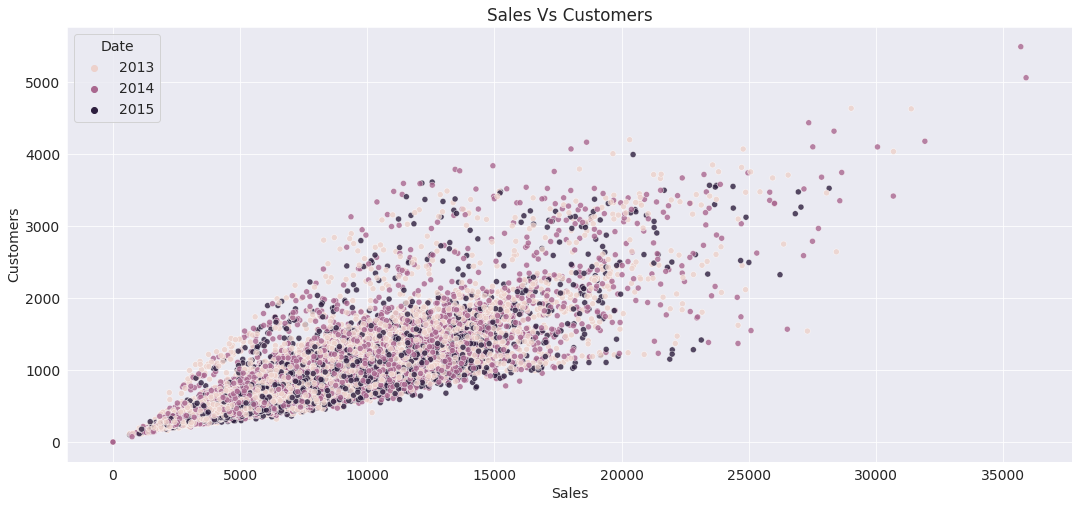

In [ ]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show();

- The No of customers have a strong correlation with sales. Here for this Kaggle competition the test dataset do not have customers info which is why we are ignoring it. 
- In the Future we can predict the No of customers and use that information to predict the Sales.

### DayOfWeek

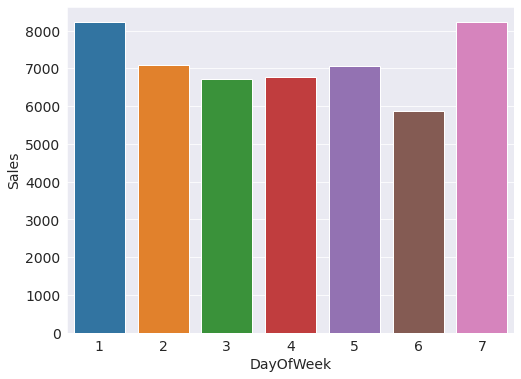

In [ ]:
# How Sales differ in each day of week
Avg_week_sales = pd.DataFrame(merged_df.groupby('DayOfWeek').agg({'Sales':'mean'}))
sns.barplot(x=Avg_week_sales.index, y = Avg_week_sales['Sales'])

- The sales are High during the start of the week and on sunday's only some  of the stores are open but the they are making great sales.

In [ ]:
# Stores open on Sunday
merged_df[(merged_df['DayOfWeek']==7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  931,  948, 1045, 1081, 1097, 1099,  877])

### Promo

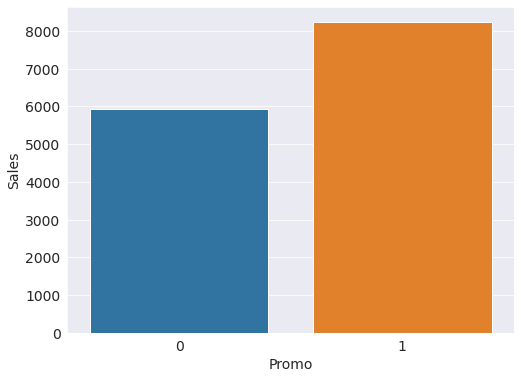

In [ ]:
Avg_Promo_sales = pd.DataFrame(merged_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Avg_Promo_sales.index, y = Avg_Promo_sales['Sales'])

- Here we observe that Sales increases by a significant amount during Promo day. This shows that Promotion has a positive effect for a store.

### State and Schoool Holiday

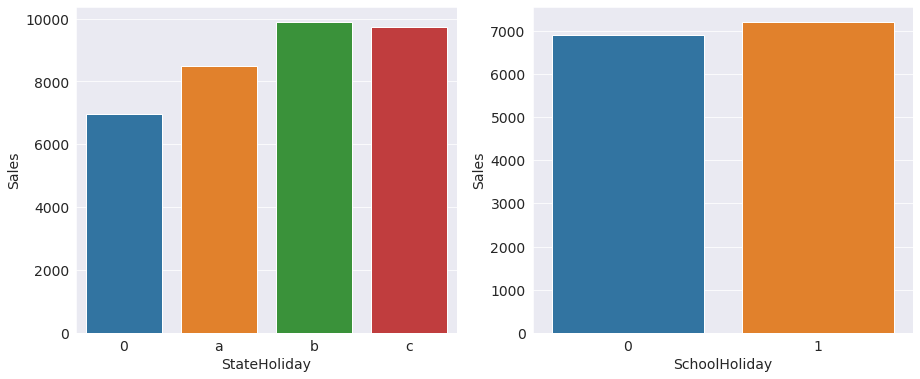

In [ ]:
Avg_StateHoliday_sales = pd.DataFrame(merged_df.groupby('StateHoliday').agg({'Sales':'mean'}))
Avg_SchoolHoliday_sales = pd.DataFrame(merged_df.groupby('SchoolHoliday').agg({'Sales':'mean'}))

# How sales differ in holidays
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax1=plt.subplot(1, 2,1)
sns.barplot(x=Avg_StateHoliday_sales.index, y = Avg_StateHoliday_sales['Sales'])
ax1=plt.subplot(1, 2,2)
sns.barplot(x=Avg_SchoolHoliday_sales.index, y = Avg_SchoolHoliday_sales['Sales']);

- The Average sales on the SchoolHoliday is mostly same.
- But on stateHoliday's the average sales are much higher than normal days

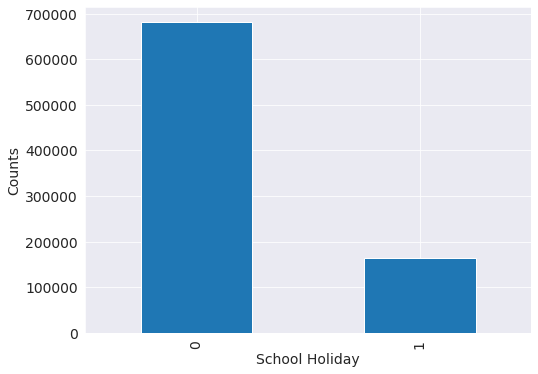

In [ ]:
# How many Total School and State holidays
merged_df['SchoolHoliday'].value_counts().plot(kind='bar')
plt.xlabel('School Holiday')
plt.ylabel('Counts');

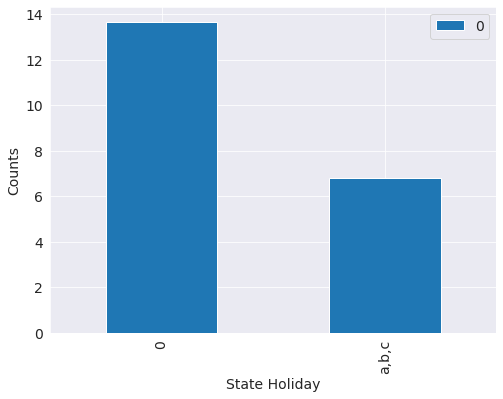

In [ ]:
stateholiday_data = {
    "0" : [np.log(merged_df['StateHoliday'].value_counts().loc["0"])],
    "a,b,c": [np.log(merged_df['StateHoliday'].value_counts().loc["a":"c"].sum())]
}
stateholiday_df = pd.DataFrame(data=stateholiday_data)
stateholiday_df.T.plot(kind="bar")
plt.xlabel('State Holiday')
plt.ylabel('Counts');

- The Number of state holidays is very low compared to school holidays and normal days.

### storeType

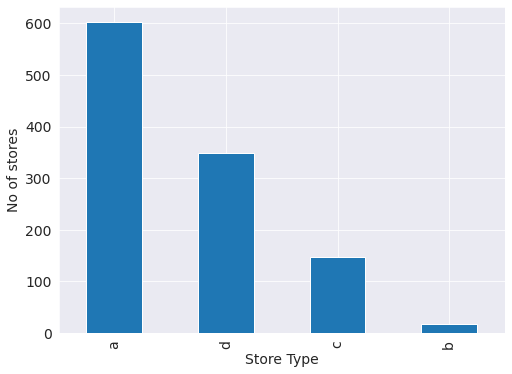

In [ ]:
store_df['StoreType'].value_counts().plot(kind='bar')
plt.xlabel('Store Type')
plt.ylabel('No of stores');

In [ ]:
merged_df.groupby("StoreType")["Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457077.0,6925.167661,3277.786381,0.0,4695.0,6285.0,8406.0,41551.0
b,15563.0,10231.407505,5157.190155,0.0,6344.0,9130.0,13183.5,38722.0
c,112978.0,6932.512755,2897.564578,0.0,4915.0,6407.0,8349.0,31448.0
d,258774.0,6822.141881,2556.582881,0.0,5050.0,6395.0,8123.0,38037.0


Total sales for each of the store Type

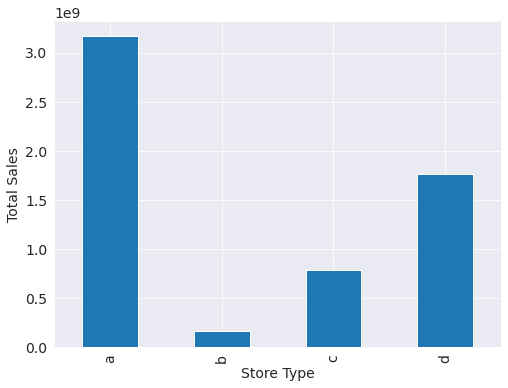

In [ ]:
merged_df.groupby("StoreType")["Sales"].sum().plot(kind="bar")
plt.xlabel('Store Type')
plt.ylabel('Total Sales');

- Stores of type B has the highest average of Sales among others but, we have much less data for StoreType B.

- The stores of type A has higher amount Sales. StoreType D goes on the second place in total sales.

### Assortment

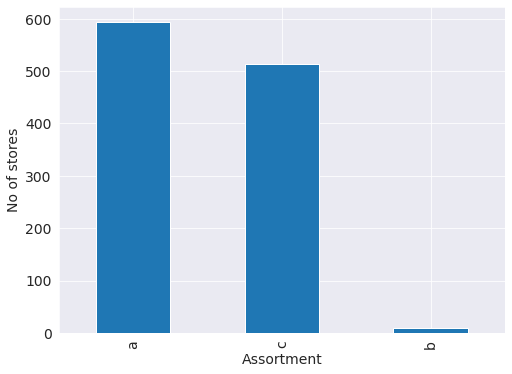

In [ ]:
store_df['Assortment'].value_counts().plot(kind='bar')
plt.xlabel('Assortment')
plt.ylabel('No of stores');

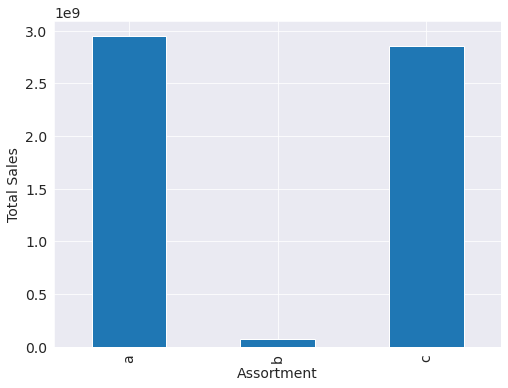

In [ ]:
merged_df.groupby("Assortment")["Sales"].sum().plot(kind="bar")
plt.xlabel('Assortment')
plt.ylabel('Total Sales');

In [ ]:
merged_df.groupby("Assortment")["Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Assortment,,,,,,,,
a,444909.0,6621.017039,2972.500222,0.0,4611.00,6082.0,8000.0,38722.0
b,8212.0,8639.346322,3806.006716,0.0,5604.75,8081.0,11269.5,22137.0
c,391271.0,7300.526339,3184.144215,0.0,5156.00,6675.0,8703.0,41551.0


- The Assortment Type b has highest average sales followed by type c and a.
- The stores of type `a` has high number of stores and has highest total sales.

### Promo2 and PromoInterval

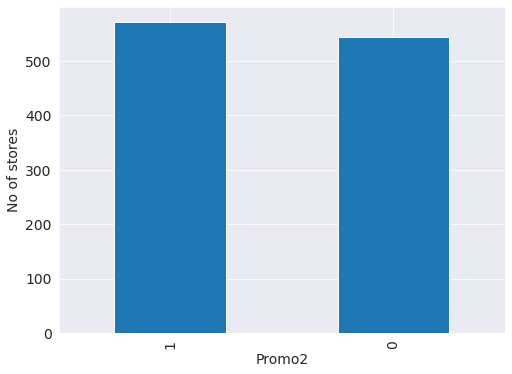

In [ ]:
store_df['Promo2'].value_counts().plot(kind='bar')
plt.xlabel('Promo2')
plt.ylabel('No of stores');

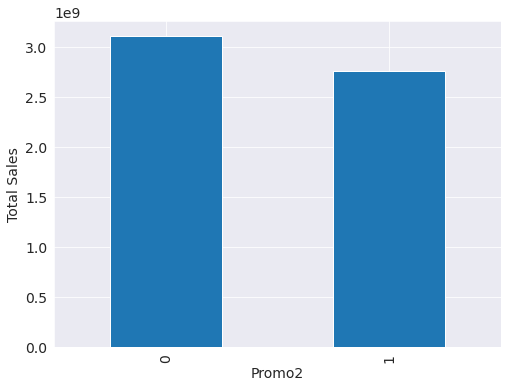

In [ ]:
merged_df.groupby("Promo2")["Sales"].sum().plot(kind="bar")
plt.xlabel('Promo2')
plt.ylabel('Total Sales');


In [ ]:
no_promo2_sales = merged_df.loc[merged_df['Promo2']==0]['Sales'].sum()
promo2_sales = merged_df.loc[merged_df['Promo2']==1]['Sales'].sum()

print(f'The difference in sales of stores with no Promo2 and sales with Promo2 is {no_promo2_sales - promo2_sales}.')

The difference in sales of stores with no Promo2 and sales with Promo2 is 349904633.


- More than Half number of stores are running the promotions.
- It is interesting to note that the total sales of stores that didn't participate in Promo2 is greater than the total of sales of stores which participated in the Promo2. And the difference between the two is pretty big(almost 350 million units).

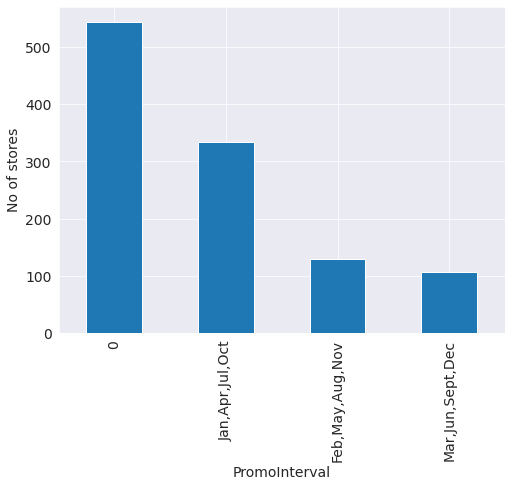

In [ ]:
store_df['PromoInterval'].value_counts().plot(kind='bar')
plt.xlabel('PromoInterval')
plt.ylabel('No of stores');

- Jan,Apr,Jul,Oct is the frequent period for running promotions more number of stores.

### CompetitionDistance

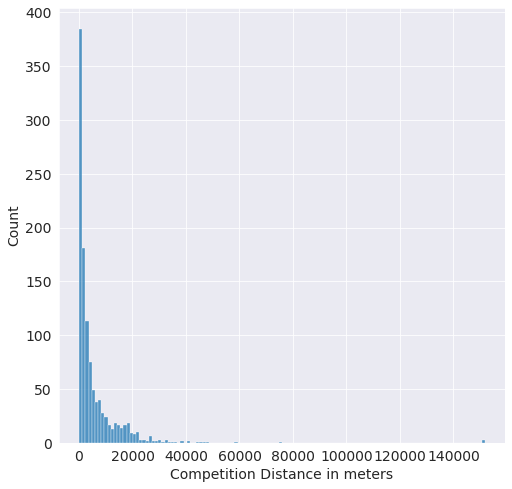

In [ ]:
#Plotting distributi,on of Competition Distance.
plt.figure(figsize=(8,8))
sns.histplot(x=store_df['CompetitionDistance'])
plt.xlabel('Competition Distance in meters')
plt.show();

- In this above figure we can observe that most of the stores have their competition within 5km range.

## Feature Engineering 

- Feature engineering is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources.
- we will analyze some of the features after applying Feature Engineering 

### Sales Features

- we can identify the top outliers and remove them using the IsolationForest.

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
sales_column = merged_df['Sales'].values.reshape(-1, 1)
isolation_forest = IsolationForest(n_estimators=100, contamination=0.001)
isolation_forest.fit(sales_column)

IsolationForest(contamination=0.001)

In [ ]:
merged_df["sales_anamoly_score"] = isolation_forest.decision_function(sales_column)
(merged_df["sales_anamoly_score"] < 0).sum()

666

In [ ]:
merged_df["sales_outliers"] = isolation_forest.predict(sales_column)
(merged_df["sales_outliers"] == -1).sum()

666

In [ ]:
print("The Outliers in the Sales dataset are in the range of ",merged_df[merged_df["sales_outliers"] == -1]["Sales"].min(),merged_df[merged_df["sales_outliers"] == -1]["Sales"].max())

The Outliers in the Sales dataset are in the range of  25444 41551


- The number of this outilers are very low when compared to our dataset, so we will drop them.

In [ ]:
merged_df = merged_df[merged_df["sales_outliers"] == 1]

In [ ]:
merged_df.shape

(843726, 19)

In [ ]:
# Removing Isolation Forest columns
merged_df.drop(['sales_anamoly_score','sales_outliers'],axis = 1, inplace=True)
merged_df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(843726, 17)

- The distribution of Sales after removing the outliers

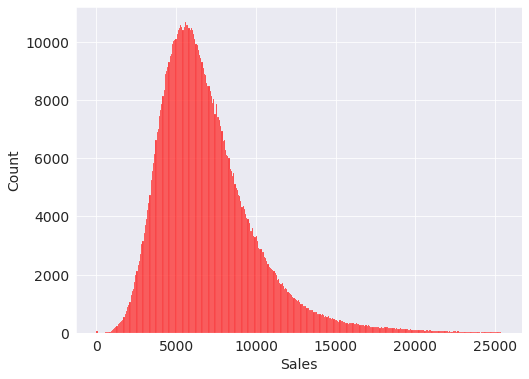

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(merged_df["Sales"], color='r');

- we will also drop the rows with sales = 0, as we have to calulate RMSPE.

In [ ]:
zero_sales_filt = merged_df["Sales"] != 0
merged_df = merged_df[zero_sales_filt]

Average sales per day 

In [ ]:
total_sales_df = pd.DataFrame(merged_df.groupby('Store').agg({'Sales':['sum',"size"]}))
total_sales_df.columns = ['total_sales',"total_open"]


In [ ]:
total_sales_df["Avg_sales_per_day"]= total_sales_df['total_sales']/total_sales_df["total_open"]

In [ ]:
total_sales_df.sort_values(by="Avg_sales_per_day",ascending=False).head(10)

,total_sales,total_open,Avg_sales_per_day
Store,,,
817,12646615,628,20137.921975
1114,14107803,709,19898.170663
262,14975348,789,18980.162231
251,13844639,742,18658.543127
842,10717161,593,18072.784148
513,13581106,759,17893.420290
562,16579245,929,17846.334769
788,13675828,769,17783.911573
383,13356522,775,17234.221935


we can merge this average sales to our dataset on store id

In [ ]:
merged_df = pd.merge(merged_df,total_sales_df["Avg_sales_per_day"], on = 'Store', how = 'left')
merged_test_df = pd.merge(merged_test_df,total_sales_df["Avg_sales_per_day"], on = 'Store', how = 'left')

In [ ]:
merged_df.sample(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_sales_per_day
841524,90,4,2013-01-03,6727,901,0,0,1,a,a,330.0,11.0,2007.0,0,NaN,NaN,0,8416.768638
429382,1109,1,2014-03-24,4167,446,0,0,0,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct",4927.204180
458779,383,4,2014-02-20,17696,2369,1,0,0,a,c,350.0,NaN,NaN,0,NaN,NaN,0,17234.221935


### Date Features

In [ ]:
#Extracting some date features for analysis.
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['WeekOfYear'] = merged_df['Date'].dt.isocalendar().week

In [ ]:
merged_test_df['Year'] = merged_test_df['Date'].dt.year
merged_test_df['Month'] = merged_test_df['Date'].dt.month
merged_test_df['Day'] = merged_test_df['Date'].dt.day
merged_test_df['WeekOfYear'] = merged_test_df['Date'].dt.isocalendar().week

In [ ]:
merged_df['Date'] = merged_df['Date'].dt.strftime('%Y-%m')
merged_test_df['Date'] = merged_test_df['Date'].dt.strftime('%Y-%m')

In [ ]:
# group by date and get average sales, and precent change
average_sales    = merged_df.groupby('Date')["Sales"].mean()
pct_change_sales = merged_df.groupby('Date')["Sales"].sum().pct_change()

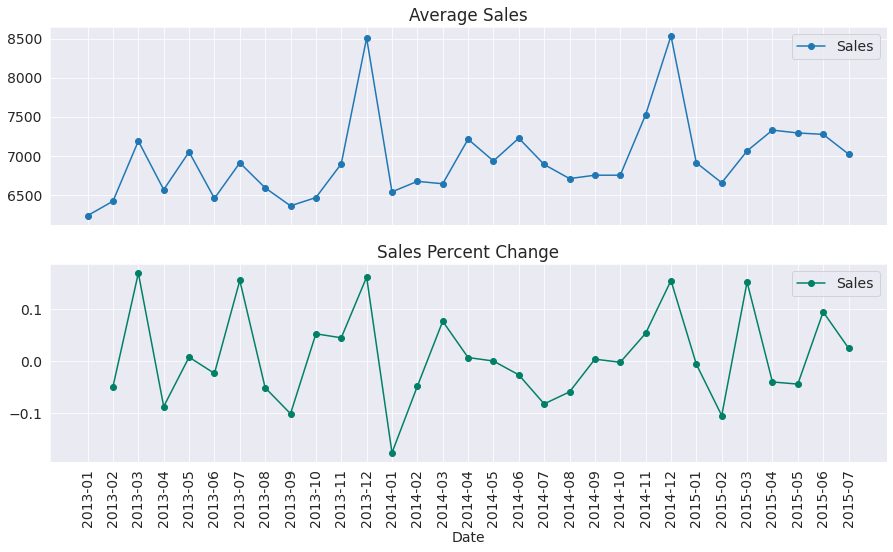

In [ ]:
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,
                         ax=axis1,
                         marker='o',
                         title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,
                            ax=axis2,
                            marker='o',
                            rot=90,
                            colormap="summer",
                            title="Sales Percent Change")

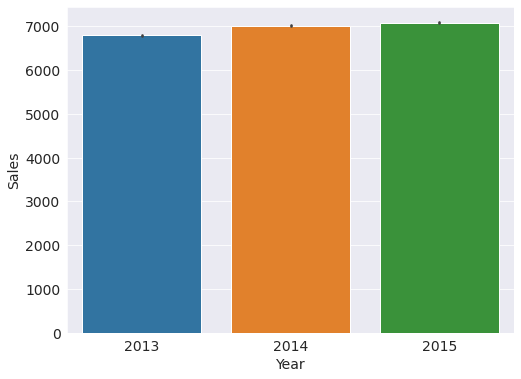

In [ ]:
sns.barplot(data=merged_df, x='Year', y='Sales')

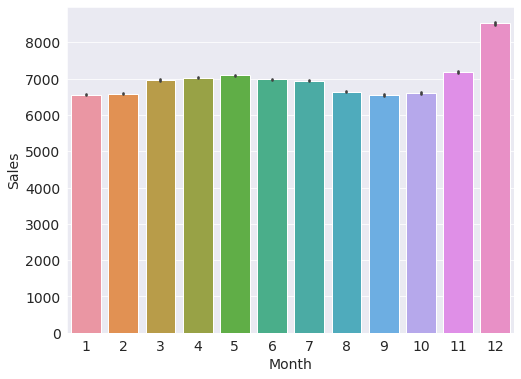

In [ ]:
sns.barplot(data=merged_df, x='Month', y='Sales')

- The Average sales are very high during the time of December, we could guess that the Christmas and New Year lead to increase in sales. 
- As Rossmann Stores sells health and beauty products, it may be guessed that during Christmas and New Year people buy beauty products as they go out to celebrate and, this might the cause of sudden increase in sales.
- The Average sales is also increased each year.

### Competition Features

Next, we can use the columns CompetitionOpenSince[Month/Year] columns from store_df to compute the number of months for which a competitor has been open near the store

In [ ]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [ ]:
comp_months(merged_df)
comp_months(merged_test_df)

In [ ]:
merged_df.sample(10).T

,189647,682163,447576,751192,437586,281434,663872,381266,811800,494188
Store,159,462,321,946,369,917,27,13,331,126
DayOfWeek,4,3,2,4,5,5,1,4,1,2
Date,2015-01,2013-06,2014-03,2013-04,2014-03,2014-09,2013-07,2014-05,2013-02,2014-01
Sales,9196,4221,6427,4362,5769,6803,16518,3563,10448,4542
Customers,773,571,599,579,499,860,1534,286,1235,475
Promo,1,0,1,1,0,0,1,0,1,0
StateHoliday,0,0,0,0,0,0,0,0,0,0
SchoolHoliday,0,0,0,0,0,0,0,0,0,0
StoreType,d,a,c,a,d,a,a,d,a,d
Assortment,a,a,c,a,c,a,a,a,c,a


### Promo features

In [ ]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [ ]:
promo_cols(merged_df)
promo_cols(merged_test_df)

### Impute missing numerical data

In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Avg_sales_per_day', 'Year',
       'Month', 'Day', 'WeekOfYear', 'CompetitionOpen', 'Promo2Open',
       'IsPromo2Month'],
      dtype='object')

In [ ]:
numeric_cols = ["Store","CompetitionDistance","CompetitionOpen","Day","Month","WeekOfYear","Promo2",'Avg_sales_per_day',"Promo2Open","Promo","IsPromo2Month","SchoolHoliday"]
categorical_cols = ["DayOfWeek","StateHoliday","Assortment","StoreType"]


In [ ]:
merged_df[numeric_cols].isna().sum()

Store                  0
CompetitionDistance    0
CompetitionOpen        0
Day                    0
Month                  0
WeekOfYear             0
Promo2                 0
Avg_sales_per_day      0
Promo2Open             0
Promo                  0
IsPromo2Month          0
SchoolHoliday          0
dtype: int64

In [ ]:
merged_test_df[numeric_cols].isna().sum()

Store                  0
CompetitionDistance    0
CompetitionOpen        0
Day                    0
Month                  0
WeekOfYear             0
Promo2                 0
Avg_sales_per_day      0
Promo2Open             0
Promo                  0
IsPromo2Month          0
SchoolHoliday          0
dtype: int64

- No features have the missing data, we have filled the CompetitionDistance during the data cleaning

### Scale Numeric Values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaling_features = ['Store','Day','Month','WeekOfYear','CompetitionDistance','CompetitionOpen','Avg_sales_per_day','Promo2Open']

In [ ]:
scaler = StandardScaler().fit(merged_df[scaling_features])

In [ ]:
merged_df[scaling_features] = scaler.transform(merged_df[scaling_features])
merged_test_df[scaling_features] = scaler.transform(merged_test_df[scaling_features])

### Encode Categorical Columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(merged_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
merged_df[encoded_cols] = encoder.transform(merged_df[categorical_cols])
merged_test_df[encoded_cols] = encoder.transform(merged_test_df[categorical_cols])

- The correlation between the features to the sales.

In [ ]:
corr_columns = numeric_cols + encoded_cols + ["Sales"]
corr_matrix = merged_df[corr_columns].corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales                  1.000000
Avg_sales_per_day      0.772262
Promo                  0.373297
DayOfWeek_1            0.179624
StoreType_b            0.137707
Assortment_c           0.105901
WeekOfYear             0.072910
Month                  0.072072
Assortment_b           0.055457
SchoolHoliday          0.039506
DayOfWeek_2            0.020366
DayOfWeek_5            0.018027
DayOfWeek_7            0.012326
StateHoliday_a         0.010450
StateHoliday_b         0.007902
Store                  0.007126
StateHoliday_c         0.005734
StoreType_c           -0.001270
CompetitionOpen       -0.002831
StoreType_a           -0.011688
StateHoliday_0        -0.013866
DayOfWeek_4           -0.025727
StoreType_d           -0.026392
DayOfWeek_3           -0.032204
CompetitionDistance   -0.041667
Day                   -0.053073
Promo2Open            -0.059477
IsPromo2Month         -0.064388
Assortment_a          -0.116673
Promo2                -0.126002
DayOfWeek_6           -0.159391
Name: Sa

## Data Preparation

In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Avg_sales_per_day', 'Year',
       'Month', 'Day', 'WeekOfYear', 'CompetitionOpen', 'Promo2Open',
       'IsPromo2Month', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Assortment_a', 'Assortment_b', 'Assortment_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d'],
      dtype='object')

In [ ]:
to_shuffle = False

In [ ]:
input_cols = numeric_cols + encoded_cols
target_cols = ['Sales']

In [ ]:
if to_shuffle:
    merged_df_shuffled = merged_df.sample(frac=1)
    inputs = merged_df_shuffled[input_cols].copy()
    targets = merged_df_shuffled[target_cols].copy()
else: 
    inputs = merged_df[input_cols].copy()
    targets = merged_df[target_cols].copy()

In [ ]:
test_inputs = merged_test_df[input_cols].copy()

In [ ]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843672 entries, 0 to 843671
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                843672 non-null  float64
 1   CompetitionDistance  843672 non-null  float64
 2   CompetitionOpen      843672 non-null  float64
 3   Day                  843672 non-null  float64
 4   Month                843672 non-null  float64
 5   WeekOfYear           843672 non-null  float64
 6   Promo2               843672 non-null  int64  
 7   Avg_sales_per_day    843672 non-null  float64
 8   Promo2Open           843672 non-null  float64
 9   Promo                843672 non-null  int64  
 10  IsPromo2Month        843672 non-null  int64  
 11  SchoolHoliday        843672 non-null  int64  
 12  DayOfWeek_1          843672 non-null  float64
 13  DayOfWeek_2          843672 non-null  float64
 14  DayOfWeek_3          843672 non-null  float64
 15  DayOfWeek_4      

In [ ]:
inputs.shape

(843672, 30)

In [ ]:
test_inputs.shape

(41088, 30)

In [ ]:
test_inputs.to_parquet("test_inputs.parquet")

In [ ]:
targets.shape

(843672, 1)

Train and validation split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(inputs, targets, test_size=0.25, random_state=42)

In [ ]:
X_train.shape,y_train.shape

((632754, 30), (632754, 1))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632754 entries, 358298 to 121958
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                632754 non-null  float64
 1   CompetitionDistance  632754 non-null  float64
 2   CompetitionOpen      632754 non-null  float64
 3   Day                  632754 non-null  float64
 4   Month                632754 non-null  float64
 5   WeekOfYear           632754 non-null  float64
 6   Promo2               632754 non-null  int64  
 7   Avg_sales_per_day    632754 non-null  float64
 8   Promo2Open           632754 non-null  float64
 9   Promo                632754 non-null  int64  
 10  IsPromo2Month        632754 non-null  int64  
 11  SchoolHoliday        632754 non-null  int64  
 12  DayOfWeek_1          632754 non-null  float64
 13  DayOfWeek_2          632754 non-null  float64
 14  DayOfWeek_3          632754 non-null  float64
 15  DayOfWeek_4 

In [ ]:
X_val.shape,y_val.shape

((210918, 30), (210918, 1))

- saving the loading the files

In [ ]:
!pip install pyarrow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
y_val = pd.read_parquet("./y-val.parquet")
X_val = pd.read_parquet("./X-val.parquet")
X_train = pd.read_parquet("./X-train.parquet")
y_train = pd.read_parquet("./y-train.parquet")
test_inputs = pd.read_parquet("./test_inputs.parquet")

## Data Modelling

First we will define the evaluation metric function and some helper functions.

In [ ]:
#The Evaluation Metric
def RMSPE(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)
    if not y_true.shape == y_pred.shape:
        return "Mismatch between size of y_true and y_true"
    loss = np.sqrt(np.mean(np.square(((np.array(y_true) - y_pred) / y_true)), axis=0))
    return loss

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

def metrics(y_true, y_pred):
    scores = {
        "RMSE" : mean_squared_error(y_true, y_pred, squared=False),
        "R2 Score" : r2_score(y_true, y_pred),
        "RMSPE" : RMSPE(y_true, y_pred)
    }

    return scores

In [ ]:
def try_model(estimator_class,**params):
    model = estimator_class(**params)
    model.fit(X_train,y_train.values.ravel())
    y_train_preds = model.predict(X_train)
    y_val_preds = model.predict(X_val)
    train_metrics = metrics(y_train, y_train_preds)
    val_metrics = metrics(y_val, y_val_preds)
    print(f"The Training set metrics are :{train_metrics.items()}")
    print(f"The Validation set metrics are :{val_metrics.items()}")
    return model,train_metrics,val_metrics

### Statistical Model

In [ ]:
import statsmodels.api as sm

In [ ]:
stats_model_inputs = inputs.drop(["Store"],axis=1)

In [ ]:
X = sm.add_constant(inputs)
y = targets
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 1.069e+05
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:03:31   Log-Likelihood:            -7.3471e+06
No. Observations:              843574   AIC:                         1.469e+07
Df Residuals:                  843547   BIC:                         1.469e+07
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.929e+13   4.49e+13      0.652      0.514   -5.87e+13    1.17e+14
Store                   1.5272      1.603      0.953      0.341      -1.614       4.669
CompetitionDistance     1.4510      1.641      0.884      0.377      -1.765       4.667
CompetitionOpen        11.8524      1.607      7.374      0.000       8.702      15.003
Day                   -14.0835      1.645     -8.560      0.000     -17.308     -10.859
Month                 185.8150      5.967     31.139      0.000     174.119     197.511
WeekOfYear             16.3659      5.947      2.752      0.006       4.710      28.022
Promo2                -58.6719      4.620    -12.699      0.000     -67.727     -49.617
Avg_sales_per_day    2346.6200      1.679   1397.881      0.000    2343.330    2349.910
Promo2Open             73.7487      2.238     32.960      0.000      69.363      78.134
Promo                2281.0859      3.578    637.537      0.000    2274.073    2288.099
IsPromo2Month         -97.2119      4.996    -19.457      0.000    -107.004     -87.419
SchoolHoliday         144.0472      4.211     34.209      0.000     135.794     152.300
DayOfWeek_1          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
DayOfWeek_2          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
DayOfWeek_3          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
DayOfWeek_4          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
DayOfWeek_5          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
DayOfWeek_6          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
DayOfWeek_7          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
StateHoliday_0      -8.457e+13    1.3e+14     -0.652      0.514   -3.39e+14    1.69e+14
StateHoliday_a      -8.457e+13    1.3e+14     -0.652      0.514   -3.39e+14    1.69e+14
StateHoliday_b      -8.457e+13    1.3e+14     -0.652      0.514   -3.39e+14    1.69e+14
StateHoliday_c      -8.457e+13    1.3e+14     -0.652      0.514   -3.39e+14    1.69e+14
Assortment_a         3.629e+13   5.56e+13      0.652      0.514   -7.27e+13    1.45e+14
Assortment_b         3.629e+13   5.56e+13      0.652      0.514   -7.27e+13    1.45e+14
Assortment_c         3.629e+13   5.56e+13      0.652      0.514   -7.27e+13    1.45e+14
StoreType_a          1.375e+13   2.11e+13      0.652      0.514   -2.75e+13     5.5e+13
StoreType_b          1.375e+13   2.11e+13      0.652      0.514   -2.75e+13     5.5e+13
StoreType_c          1.375e+13   2.11e+13      0.652      0.514   -2.75e+13     5.5e+13
StoreType_d          1.375e+13   2.11e+13      0.652      0.514   -2.75e+13     5.5e+13
==============================================================================
Omnibus:    

In [ ]:
metrics(y,y_pred)

{'RMSE': 1466.4611135605437,
 'R2 Score': 0.7671244105998114,
 'RMSPE': 0.3113755960125174}

- According to this we can build a good regression model with an 76 percent accuracy. There are some fetures that have negative impact on the linear model which can be addressed with regularization and tree models

### Basleline Models

#### MeanRegressor
This will return mean values for all the predictions

In [ ]:
class MeanRegressor:
  def fit(self,inputs, targets):
    self.mean =np.mean(targets)
  
  def predict(self, inputs):
    return np.full(inputs.shape[0] , self.mean)

 

In [ ]:
mean_model,mean_train_metrics,mean_val_metrics = try_model(MeanRegressor)

The Training set metrics are :dict_items([('RMSE', 3038.174412565663), ('R2 Score', 0.0), ('RMSPE', 0.6401881155211965)])
The Validation set metrics are :dict_items([('RMSE', 3040.8581762229433), ('R2 Score', -4.6928125767564666e-06), ('RMSPE', 0.6052809735297511)])


### LinearModels

In [ ]:
from sklearn.linear_model import LinearRegression,ElasticNet,RidgeCV,LassoCV,SGDRegressor


LinearRegression

In [ ]:
%%time
LR_model,LR_train_metrics,LR_val_metrics = try_model(LinearRegression)

The Training set metrics are :dict_items([('RMSE', 1466.0139130631346), ('R2 Score', 0.7671636512043882), ('RMSPE', 0.3258165680003978)])
The Validation set metrics are :dict_items([('RMSE', 1467.8395005681093), ('R2 Score', 0.766994137228965), ('RMSPE', 0.26271801894505104)])
CPU times: user 1.41 s, sys: 219 ms, total: 1.63 s
Wall time: 1.02 s


- Our base Linear Regression Model is performs very well when compared to our Dummy model MeanRegressor

Linear Regression with Regularization

- we will use ElasticNet Regularization and tune the l1_ratio to get the L1(Lasso Regularization) and L2 (Ridge Regularization)

In [ ]:
%%time
#Default L1 ratio is 0.5
ENR_model,ENR_train_metrics,ENR_val_metrics = try_model(ElasticNet)

The Training set metrics are :dict_items([('RMSE', 1853.6131141050773), ('R2 Score', 0.6277687907742868), ('RMSPE', 0.40469391010508365)])
The Validation set metrics are :dict_items([('RMSE', 1856.7669878825639), ('R2 Score', 0.6271582657777132), ('RMSPE', 0.3527743284797764)])
CPU times: user 1.03 s, sys: 199 ms, total: 1.23 s
Wall time: 716 ms


- The ElasticNet Regularization with l1_ratio has performed worse than our Linear Model.
- We can set the l1_ratio to 0, Now the penalty is an L2 penalty (Ridge). But the Ridge methods are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV. 

In [ ]:
%%time
ridge_model,ridge_train_metrics,ridge_val_metrics = try_model(RidgeCV)

The Training set metrics are :dict_items([('RMSE', 1466.0140135352358), ('R2 Score', 0.767163619289878), ('RMSPE', 0.32581735275424634)])
The Validation set metrics are :dict_items([('RMSE', 1467.8367722796972), ('R2 Score', 0.7669950034089585), ('RMSPE', 0.2627204128932399)])
CPU times: user 2.89 s, sys: 601 ms, total: 3.49 s
Wall time: 2.66 s


- The ridge model is similar to our Linear Model and perfomed better to ElasticNet model with l1_ratio = 0.5.
- We can set the l1_ratio to 1.0, Now the penalty is an L1 penalty (Lasso). But the Lasso methods are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Lasso/LassoCV.

In [ ]:
%%time
lasso_model,lasso_train_metrics,lasso_val_metrics = try_model(LassoCV)

The Training set metrics are :dict_items([('RMSE', 1466.3250500283548), ('R2 Score', 0.7670648094651311), ('RMSPE', 0.3244165774583762)])
The Validation set metrics are :dict_items([('RMSE', 1468.1360640395314), ('R2 Score', 0.7668999743342999), ('RMSPE', 0.2614979087585242)])
CPU times: user 7.22 s, sys: 1.35 s, total: 8.57 s
Wall time: 7.16 s


- The metrics are similar to Linear model. we can increase the penalty for the Regularization. But first we will try some the other models. 

Gradient Descent Methods

- SGDregressor

In [ ]:
%%time
SGD_model,SGD_train_metrics,SGD_val_metrics = try_model(SGDRegressor)

The Training set metrics are :dict_items([('RMSE', 1466.4479815870632), ('R2 Score', 0.7670257508861583), ('RMSPE', 0.3250778275061207)])
The Validation set metrics are :dict_items([('RMSE', 1468.3539379496763), ('R2 Score', 0.766830784313448), ('RMSPE', 0.26209814948593824)])
CPU times: user 6.68 s, sys: 129 ms, total: 6.81 s
Wall time: 6.66 s


- SGDRegressor with L1 penalty

In [ ]:
%%time
SGDL1_model,SGDL1_train_metrics,SGDL1_val_metrics = try_model(SGDRegressor,penalty="l1")

The Training set metrics are :dict_items([('RMSE', 1466.450149799448), ('R2 Score', 0.7670250619588563), ('RMSPE', 0.3240570025612629)])
The Validation set metrics are :dict_items([('RMSE', 1468.2996460789775), ('R2 Score', 0.766848026694249), ('RMSPE', 0.26142768634005054)])
CPU times: user 8.99 s, sys: 117 ms, total: 9.1 s
Wall time: 8.92 s


### Tree Models

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from xgboost import XGBRegressor

- DecisionTreeRegressor

In [ ]:
%%time
Dtree,Dtree_train_metrics,Dtree_val_metrics = try_model(DecisionTreeRegressor,random_state=42)

The Training set metrics are :dict_items([('RMSE', 0.0), ('R2 Score', 1.0), ('RMSPE', 0.0)])
The Validation set metrics are :dict_items([('RMSE', 1134.579356155566), ('R2 Score', 0.860787106009983), ('RMSPE', 0.18430804931148168)])
CPU times: user 10.8 s, sys: 54.7 ms, total: 10.8 s
Wall time: 11.3 s


- RandomForestRegressor

In [ ]:
%%time
RFreg,RFreg_train_metrics,RFreg_val_metrics = try_model(RandomForestRegressor,random_state=42)

The Training set metrics are :dict_items([('RMSE', 302.38997973339326), ('R2 Score', 0.9901609559179687), ('RMSPE', 0.07794209493905668)])
The Validation set metrics are :dict_items([('RMSE', 799.8672143346613), ('R2 Score', 0.9310091414159017), ('RMSPE', 0.13330924465474842)])
CPU times: user 12min 40s, sys: 8.77 s, total: 12min 48s
Wall time: 12min 54s


- Light GBM

In [ ]:
%%time
Lgbm_model,Lgbm_train_metrics,Lgbm_val_metrics = try_model(lgb.LGBMRegressor,random_state=42)

The Training set metrics are :dict_items([('RMSE', 1043.073166663701), ('R2 Score', 0.8821297667857637), ('RMSPE', 0.2546228483730491)])
The Validation set metrics are :dict_items([('RMSE', 1048.4625276352535), ('R2 Score', 0.8811181557490143), ('RMSPE', 0.19399280716778655)])
CPU times: user 21 s, sys: 158 ms, total: 21.1 s
Wall time: 11.1 s


- XGboost

In [ ]:
%%time
Xgb_model,Xgb_train_metrics,Xgb_val_metrics = try_model(XGBRegressor,random_state=42)

[04:08:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Training set metrics are :dict_items([('RMSE', 1218.587073999634), ('R2 Score', 0.8457100813834996), ('RMSPE', 0.29826372885746555)])
The Validation set metrics are :dict_items([('RMSE', 1215.5678169624584), ('R2 Score', 0.8470595400085921), ('RMSPE', 0.2354523618757418)])
CPU times: user 1min 9s, sys: 438 ms, total: 1min 9s
Wall time: 1min 10s


- The tree based models have outperformed the Linear models with just the default Hyperparameters. we can improve these futher by tuning the Hyperparameters.

In [ ]:
jovian.commit(project="rossman-sales-prediction")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/vasanthsai26/rossman-sales-prediction


'https://jovian.ai/vasanthsai26/rossman-sales-prediction'

## Hyperparameter Tuning


we will tune the Hyperparameters By hand,RandomisedSearchCV and GridSearchCV methods to identify the best Hyperparameters. 

### DecisionTreeRegressor

In [ ]:
Dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

- First we will see the max values that the tree has trained

In [ ]:
Dtree.get_depth()

48

In [ ]:
Dtree.get_n_leaves()

632012

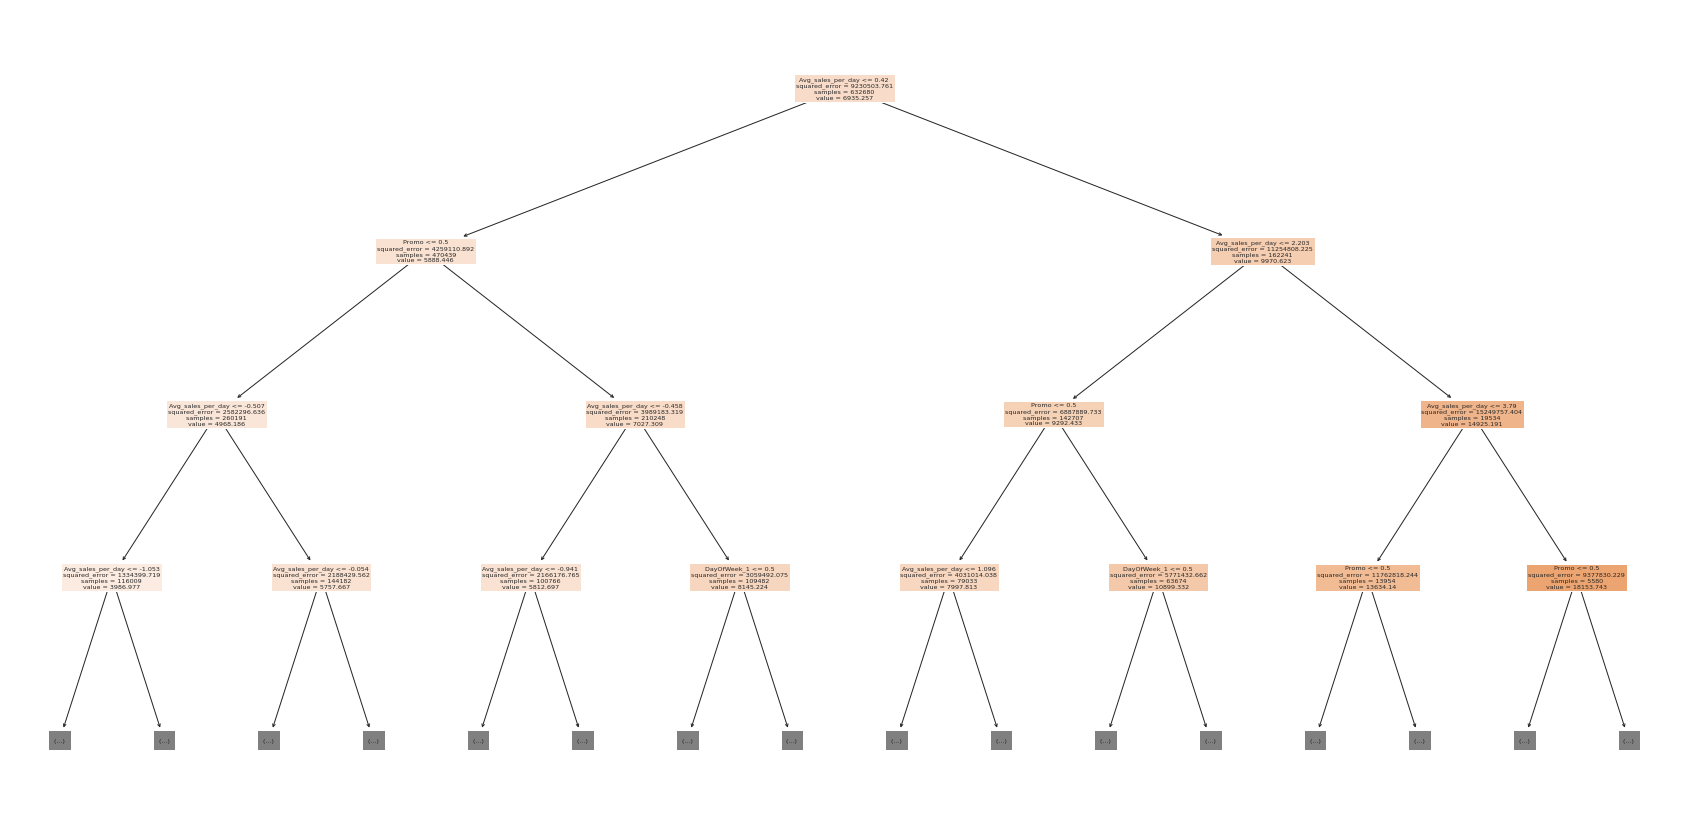

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(30,15))
# Visualize the tree graphically using plot_tree
plot_tree(Dtree,feature_names=X_train.columns,max_depth=3,filled=True);

- These are the default Hyperparameters for the DecisionTreeRegressor. we will tune this Hyperparameters

In [ ]:
def test_params(**params):
    model = DecisionTreeRegressor(random_state=42, **params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

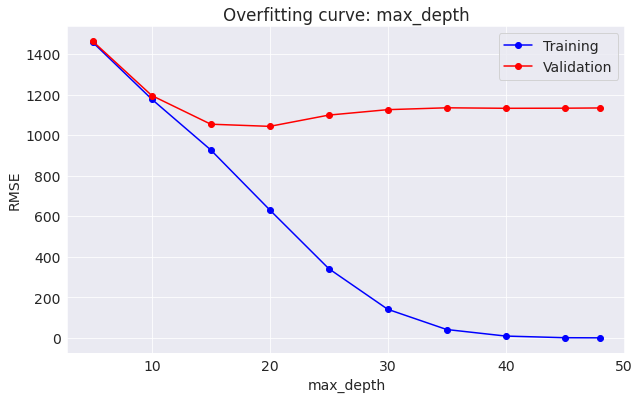

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35,40,45,48])

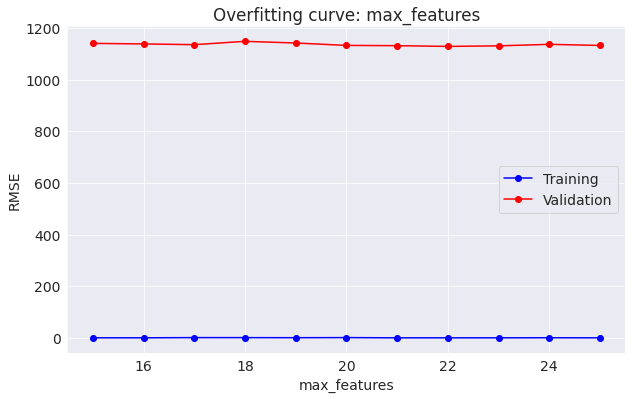

In [ ]:
test_param_and_plot('max_features', list(np.arange(15,26)))

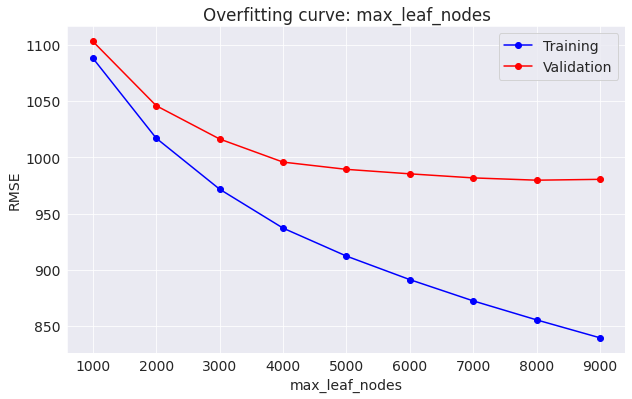

In [ ]:
test_param_and_plot('max_leaf_nodes', list(np.arange(1000,10000,1000)))

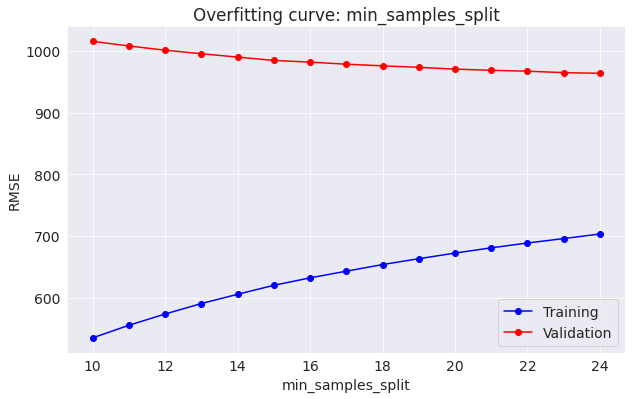

In [ ]:
test_param_and_plot('min_samples_split', list(np.arange(10,25)))

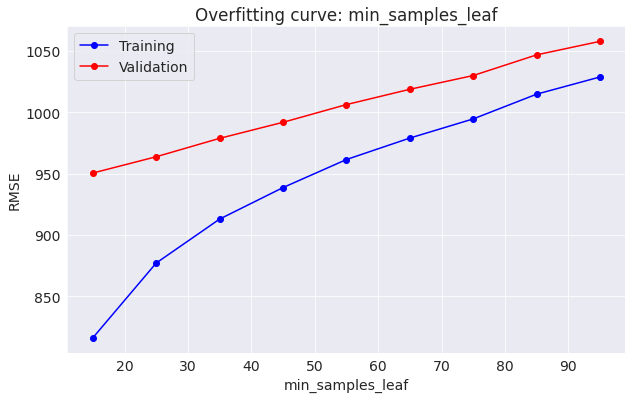

In [ ]:
test_param_and_plot('min_samples_leaf', list(np.arange(15,100,10)))

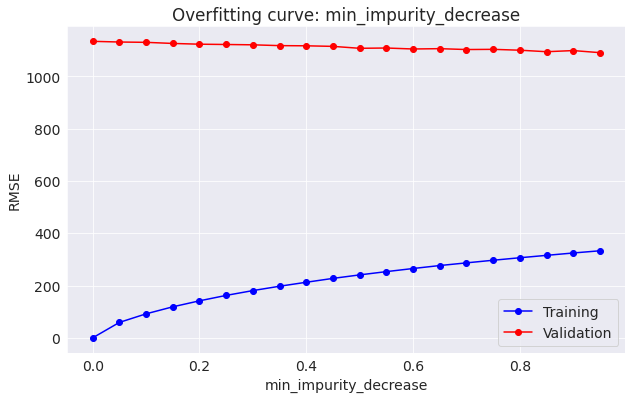

In [ ]:
test_param_and_plot('min_impurity_decrease', list(np.arange(0.0,1.0,0.05)))

- RandomisedSearchCV

In [ ]:
params = {#'criterion': ['squared_error','absolute_error', 'poisson'],
 'max_depth': [14,15,16,17],
 'max_features': ['auto', 'sqrt','log2',15,16,17],
 'max_leaf_nodes': list(np.arange(1000,10000,1000)),
 'min_impurity_decrease': [0.0,0.05,0.1,0.15,0.2],
 'min_samples_leaf': [1,2,3,5,7,10,12,15],
 'min_samples_split': [2,3,4,5]
 }

In [ ]:
Dtree_model = DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rscv_dtree_model = RandomizedSearchCV(estimator = Dtree_model,
                                      param_distributions=params,
                                      n_iter=50,
                                      #n_jobs=-1,
                                      cv=5,
                                      verbose=2)

In [ ]:
%%time
rscv_dtree_model.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=16, max_features=16, max_leaf_nodes=5000, min_impurity_decrease=0.05, min_samples_leaf=7, min_samples_split=2; total time=   3.6s
[CV] END max_depth=16, max_features=16, max_leaf_nodes=5000, min_impurity_decrease=0.05, min_samples_leaf=7, min_samples_split=2; total time=   3.6s
[CV] END max_depth=16, max_features=16, max_leaf_nodes=5000, min_impurity_decrease=0.05, min_samples_leaf=7, min_samples_split=2; total time=   3.5s
[CV] END max_depth=16, max_features=16, max_leaf_nodes=5000, min_impurity_decrease=0.05, min_samples_leaf=7, min_samples_split=2; total time=   3.6s
[CV] END max_depth=16, max_features=16, max_leaf_nodes=5000, min_impurity_decrease=0.05, min_samples_leaf=7, min_samples_split=2; total time=   3.5s
[CV] END max_depth=17, max_features=16, max_leaf_nodes=5000, min_impurity_decrease=0.0, min_samples_leaf=7, min_samples_split=2; total time=   3.6s
[CV] END max_depth=17, max_features=16, max_l

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [14, 15, 16, 17],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         15, 16, 17],
                                        'max_leaf_nodes': [1000, 2000, 3000,
                                                           4000, 5000, 6000,
                                                           7000, 8000, 9000],
                                        'min_impurity_decrease': [0.0, 0.05,
                                                                  0.1, 0.15,
                                                                  0.2],
                                        'min_samples_leaf': [1, 2, 3, 5, 7, 10,
                                                             12, 15],
                                        'min_samples_split': [2, 

In [ ]:
rscv_dtree_model.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 15,
 'min_impurity_decrease': 0.1,
 'max_leaf_nodes': 8000,
 'max_features': 16,
 'max_depth': 17}

In [ ]:
rscv_dtree_model.best_score_

0.885311318225968

- GridSearchCV

In [ ]:
grid_params = {
 'min_samples_split': [3],
 'min_samples_leaf': [9,10,11],
 'min_impurity_decrease':[0.15,0.16],
 'max_leaf_nodes':[7500,8000,8500],
 'max_features': [17],
 'max_depth': [16,17,18]
}


In [ ]:
from sklearn.model_selection import GridSearchCV
gcv_dtree_model = GridSearchCV(estimator = Dtree_model,
                                      param_grid=grid_params,
                                      #n_iter=50,
                                      #n_jobs=-1,
                                      cv=5,
                                      verbose=2)

In [ ]:
%%time
gcv_dtree_model.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=16, max_features=17, max_leaf_nodes=7500, min_impurity_decrease=0.15, min_samples_leaf=9, min_samples_split=3; total time=   3.7s
[CV] END max_depth=16, max_features=17, max_leaf_nodes=7500, min_impurity_decrease=0.15, min_samples_leaf=9, min_samples_split=3; total time=   3.6s
[CV] END max_depth=16, max_features=17, max_leaf_nodes=7500, min_impurity_decrease=0.15, min_samples_leaf=9, min_samples_split=3; total time=   3.5s
[CV] END max_depth=16, max_features=17, max_leaf_nodes=7500, min_impurity_decrease=0.15, min_samples_leaf=9, min_samples_split=3; total time=   3.6s
[CV] END max_depth=16, max_features=17, max_leaf_nodes=7500, min_impurity_decrease=0.15, min_samples_leaf=9, min_samples_split=3; total time=   3.5s
[CV] END max_depth=16, max_features=17, max_leaf_nodes=7500, min_impurity_decrease=0.15, min_samples_leaf=10, min_samples_split=3; total time=   3.6s
[CV] END max_depth=16, max_features=17, max

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [16, 17, 18], 'max_features': [17],
                         'max_leaf_nodes': [7500, 8000, 8500],
                         'min_impurity_decrease': [0.15, 0.16],
                         'min_samples_leaf': [9, 10, 11],
                         'min_samples_split': [3]},
             verbose=2)

In [ ]:
gcv_dtree_model.best_score_

0.8890666454304622

In [ ]:
gcv_dtree_model.best_params_

{'max_depth': 18,
 'max_features': 17,
 'max_leaf_nodes': 8500,
 'min_impurity_decrease': 0.15,
 'min_samples_leaf': 9,
 'min_samples_split': 3}

In [ ]:
params = {'max_depth': 18,
 'max_features': 17,
 'max_leaf_nodes': 8500,
 'min_impurity_decrease': 0.15,
 'min_samples_leaf': 9,
 'min_samples_split': 3}
params["random_state"] = 42
Dtree_best,Dtree_best_train_metrics,Dtree_best_val_metrics = try_model(DecisionTreeRegressor,**params)

The Training set metrics are :dict_items([('RMSE', 917.6094112655876), ('R2 Score', 0.9092482685336774), ('RMSPE', 0.20598494994450253)])
The Validation set metrics are :dict_items([('RMSE', 1008.4329306314061), ('R2 Score', 0.8896986839190524), ('RMSPE', 0.17757486290590405)])


In [ ]:
joblib.dump(Dtree_best, 'Dtree-best-model.joblib')

['Dtree-best-model.joblib']

In [ ]:
Dtree_best = joblib.load('Dtree-best-model.joblib')


### RandomForestRegressor

In [ ]:
RFreg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

- Below are the functions to idenitfy the close to best value of a Hyperparameter.

In [ ]:
def RFR_test_params(**params):
    model = RandomForestRegressor(random_state=42,n_jobs=-1, **params).fit(X_train, y_train.values.ravel())
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val, squared=False)
    return train_rmse, val_rmse

def RFR_test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = RFR_test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [ ]:
%%time
model = RandomForestRegressor(random_state=42,n_jobs=-1, max_depth=15).fit(X_train, y_train.values.ravel())

CPU times: user 11min 3s, sys: 798 ms, total: 11min 4s
Wall time: 5min 47s


In [ ]:
metrics(y_train,model.predict(X_train))

{'RMSE': 861.9477567857733,
 'R2 Score': 0.9195110088624288,
 'RMSPE': 0.20097742135839342}

In [ ]:
metrics(y_val,model.predict(X_val))

{'RMSE': 950.6872206236275,
 'R2 Score': 0.9022571452070401,
 'RMSPE': 0.17207979276322563}

cycle started
cycle started
cycle started
cycle started
cycle started


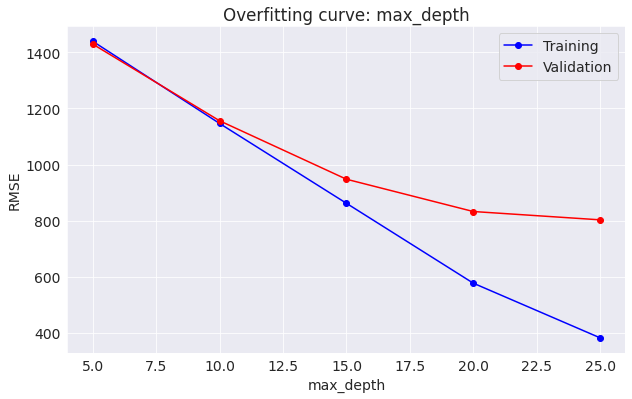

In [ ]:
RFR_test_param_and_plot('max_depth', [5, 10, 15, 20, 25])

cycle started
cycle started
cycle started
cycle started
cycle started
cycle started


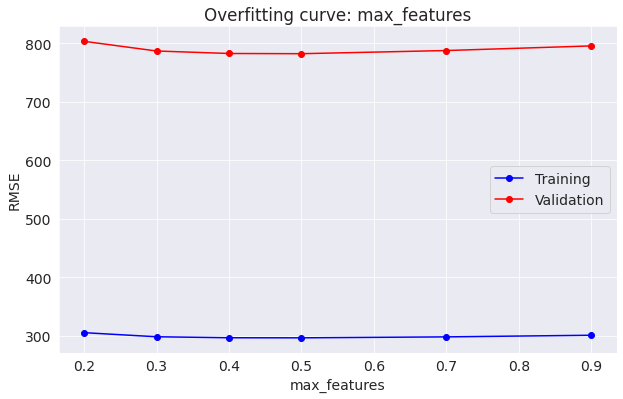

In [ ]:
RFR_test_param_and_plot('max_features', [0.2,0.3, 0.4, 0.5,0.7, 0.9])

cycle started
cycle started
cycle started
cycle started
cycle started
cycle started
cycle started


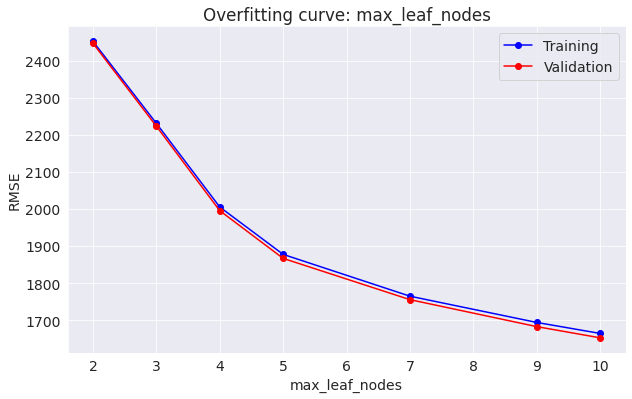

In [ ]:
RFR_test_param_and_plot('max_leaf_nodes', [2,3, 4, 5,7, 9,10])

cycle started
cycle started
cycle started
cycle started


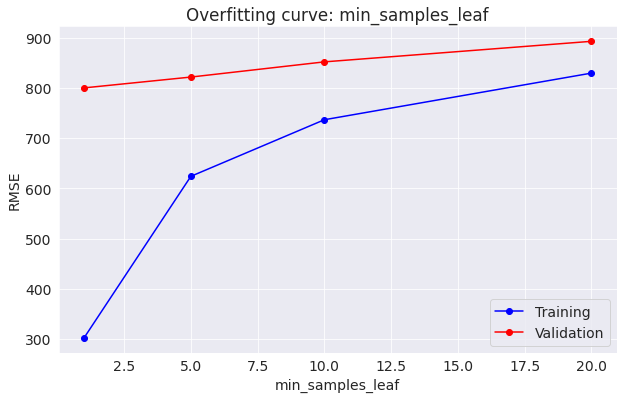

In [ ]:
RFR_test_param_and_plot('min_samples_leaf', [1, 5,10,20])


cycle started
cycle started
cycle started
cycle started


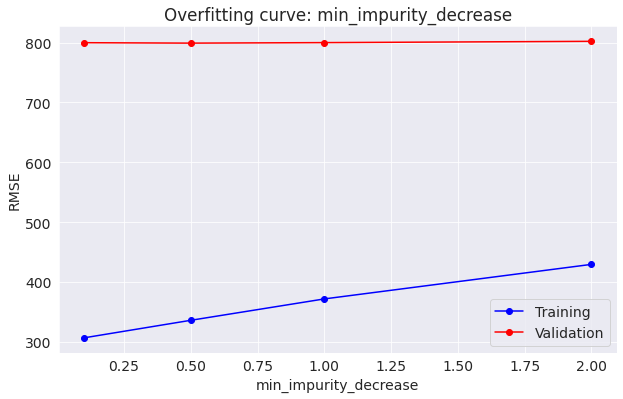

In [ ]:
RFR_test_param_and_plot('min_impurity_decrease', [0.1, 0.5, 1.0,2.0])

cycle started
cycle started
cycle started
cycle started


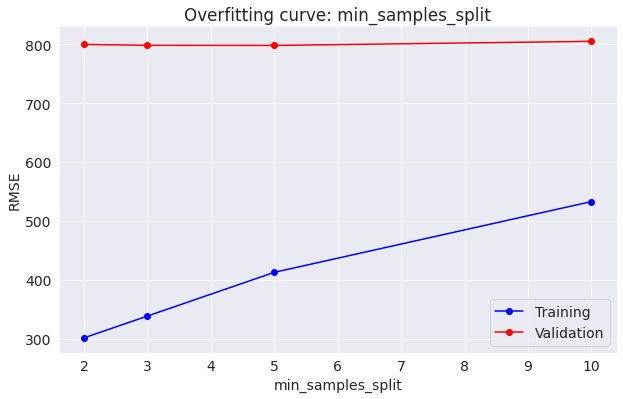

In [ ]:
RFR_test_param_and_plot('min_samples_split', [2, 3, 5,10])

cycle started
cycle started
cycle started
cycle started
cycle started
cycle started
cycle started
cycle started
cycle started
cycle started
cycle started


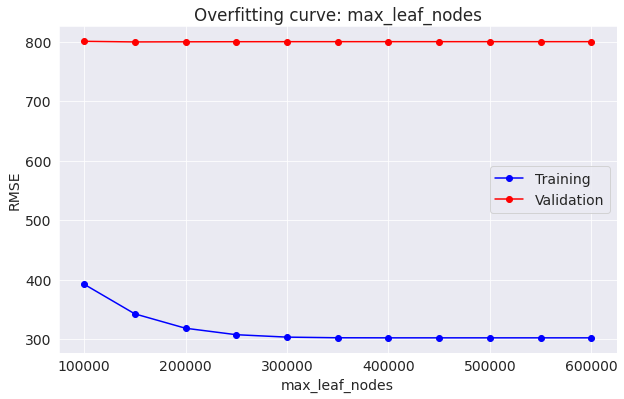

In [ ]:
RFR_test_param_and_plot('max_leaf_nodes', list(np.arange(100000,650000,50000)))

In [ ]:
Rfreg_best_params = {'random_state' : 42,
                     'n_jobs' : -1,
                     'n_estimators': 250,
                     'min_samples_split' : 3,
                     'max_features' : 0.5
}

In [ ]:
%%time
RFR_best,RFR_best_train_metrics,RFR_best_val_metrics = try_model(RandomForestRegressor,**Rfreg_best_params)

The Training set metrics are :dict_items([('RMSE', 346.09902514872783), ('R2 Score', 0.9871110105972847), ('RMSPE', 0.10695030864929196)])
The Validation set metrics are :dict_items([('RMSE', 777.3554588915309), ('R2 Score', 0.9348379013062629), ('RMSPE', 0.13005616398494466)])
CPU times: user 23min 18s, sys: 14.3 s, total: 23min 33s
Wall time: 12min 8s


In [ ]:
import joblib
joblib.dump(RFR_best, 'RFR-best-model.joblib')

['RFR-best-model.joblib']

In [ ]:
RFR_best = joblib.load('RFR-best-model.joblib')


### Light GBM

For Better Accuracy
- Use large max_bin (may be slower)
- Use small learning_rate with large num_iterations
- Use large num_leaves (may cause over-fitting)
- Use bigger training data
- Try dart

Deal with Over-fitting 
- Use small max_bin
- Use small num_leaves
- Use min_data_in_leaf and min_sum_hessian_in_leaf
- Use bagging by set bagging_fraction and bagging_freq
- Use feature sub-sampling by set feature_fraction
- Use bigger training data
- Try lambda_l1, lambda_l2 and min_gain_to_split for regularization
- Try max_depth to avoid growing deep tree
- Try extra_trees
- Try increasing path_smooth

In [ ]:
Lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
def Lgbm_test_params(**params):
    model = lgb.LGBMRegressor(random_state=42,n_jobs=-1,**params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val, squared=False)
    return train_rmse, val_rmse

def Lgbm_test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        print("cycle is started")
        params = {param_name: value}
        train_rmse, val_rmse = Lgbm_test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started


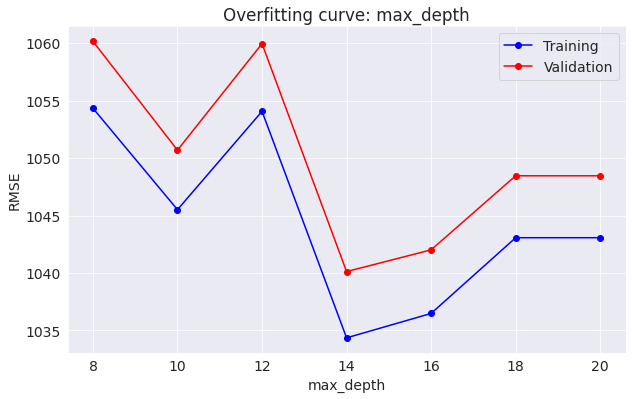

In [ ]:
Lgbm_test_param_and_plot("max_depth",list(np.arange(8,21,2)))

cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
CPU times: user 9min 23s, sys: 1.55 s, total: 9min 25s
Wall time: 9min 21s


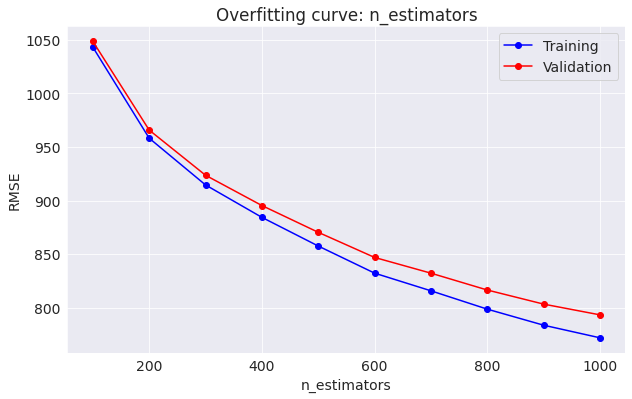

In [ ]:
%%time
Lgbm_test_param_and_plot("n_estimators",list(np.arange(100,1001,100)))

- The RMSE values are keep on decreasing with increase in no of estimators, we will us the max no of estimators after finding all other Hyperparameters.

cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
CPU times: user 3min 42s, sys: 779 ms, total: 3min 42s
Wall time: 3min 41s


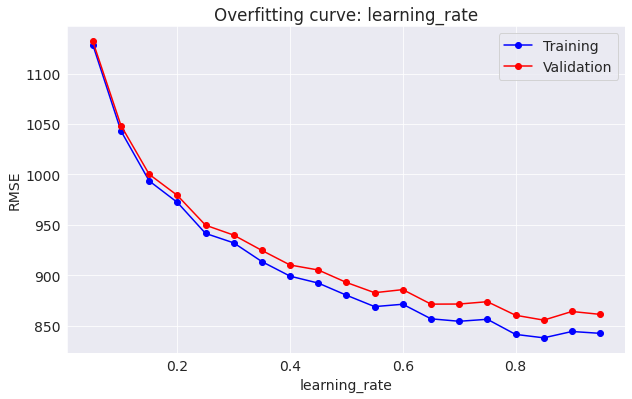

In [ ]:
%%time
Lgbm_test_param_and_plot("learning_rate",list(np.arange(0.05,1.0,0.05)))

cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
CPU times: user 2min 2s, sys: 369 ms, total: 2min 2s
Wall time: 2min 1s


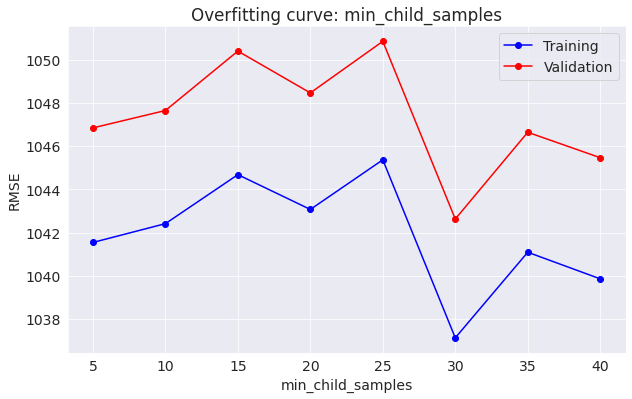

In [ ]:
%%time
Lgbm_test_param_and_plot("min_child_samples",list(np.arange(5,41,5)))

In [ ]:
Lgbm_params = {#'boosting_type': ['gbdt','dart'],
               'max_depth': [-1,10,14,18],
               'n_estimators': [250,500],
               'learning_rate': [0.1,0.2,0.4,0.5],
               'min_child_samples': [20,25,30,40],
               'num_leaves': [31,33,35],
}

In [ ]:
LGBM_tree = lgb.LGBMRegressor(random_state=42,n_jobs=-1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rscv_lgbm_model = RandomizedSearchCV(estimator = LGBM_tree,
                                      param_distributions=Lgbm_params,
                                      n_iter=50,
                                      cv=3,
                                      verbose=2)

In [ ]:
rscv_lgbm_model.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.4, max_depth=10, min_child_samples=20, n_estimators=250, num_leaves=35; total time=  19.9s
[CV] END learning_rate=0.4, max_depth=10, min_child_samples=20, n_estimators=250, num_leaves=35; total time=  13.2s
[CV] END learning_rate=0.4, max_depth=10, min_child_samples=20, n_estimators=250, num_leaves=35; total time=  11.5s
[CV] END learning_rate=0.1, max_depth=14, min_child_samples=30, n_estimators=500, num_leaves=33; total time=  24.8s
[CV] END learning_rate=0.1, max_depth=14, min_child_samples=30, n_estimators=500, num_leaves=33; total time=  26.1s
[CV] END learning_rate=0.1, max_depth=14, min_child_samples=30, n_estimators=500, num_leaves=33; total time=  26.1s
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=25, n_estimators=500, num_leaves=31; total time=  22.1s
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=25, n_estimators=500, num_leaves=31; total time=  21.9s
[CV] END l

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=42), n_iter=50,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.4, 0.5],
                                        'max_depth': [-1, 10, 14, 18],
                                        'min_child_samples': [20, 25, 30, 40],
                                        'n_estimators': [250, 500],
                                        'num_leaves': [31, 33, 35]},
                   verbose=2)

In [ ]:
rscv_lgbm_model.best_params_

{'num_leaves': 35,
 'n_estimators': 500,
 'min_child_samples': 20,
 'max_depth': 10,
 'learning_rate': 0.5}

In [ ]:
rscv_lgbm_model.best_score_

0.9423156990794572

In [ ]:
LGBM_params = {'num_leaves': 35,
 'n_estimators': 500,
 'min_child_samples': 20,
 'max_depth': 10,
 'learning_rate': 0.5}
LGBM_params["random_state"] = 42
LGBM_params['n_estimators'] = 1500

In [ ]:
LGBM_params

{'num_leaves': 35,
 'n_estimators': 1500,
 'min_child_samples': 20,
 'max_depth': 10,
 'learning_rate': 0.5,
 'random_state': 42}

In [ ]:
%%time
lgbm_best,lgbm_best_train_metrics,lgbm_best_val_metrics = try_model(lgb.LGBMRegressor,**LGBM_params)

The Training set metrics are :dict_items([('RMSE', 552.0526335672279), ('R2 Score', 0.9671526624491559), ('RMSPE', 0.17123116292519017)])
The Validation set metrics are :dict_items([('RMSE', 668.5378881363348), ('R2 Score', 0.9515226684295569), ('RMSPE', 0.13010168564792135)])
CPU times: user 3min 21s, sys: 775 ms, total: 3min 22s
Wall time: 1min 48s


In [ ]:
joblib.dump(lgbm_best, 'lgbm-best-model.joblib')

['lgbm-best-model.joblib']

In [ ]:
lgbm_best = joblib.load('lgbm-best-model.joblib')


### XGBoost

In [ ]:
Xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
def xgbm_test_params(**params):
    model = XGBRegressor(random_state=42,n_jobs=-1,**params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val, squared=False)
    return train_rmse, val_rmse

def xgbm_test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        print("cycle is started")
        params = {param_name: value}
        train_rmse, val_rmse = xgbm_test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

cycle is started
[04:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:10:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:13:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:18:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


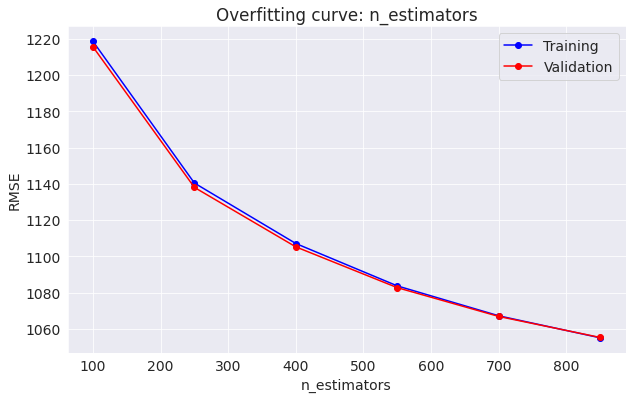

In [ ]:
xgbm_test_param_and_plot('n_estimators',list(np.arange(100,1000,150)))

cycle is started
[04:42:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:49:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[05:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[05:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:02:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:square

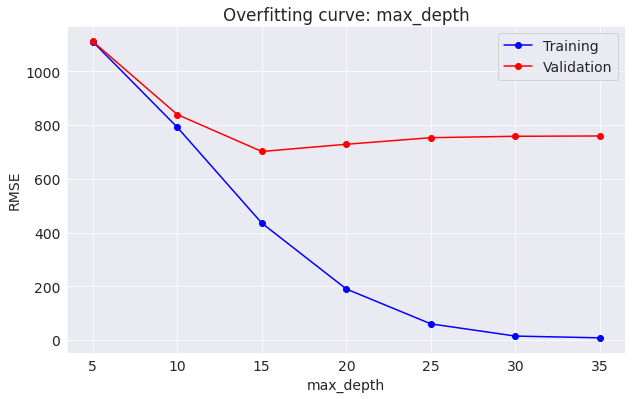

In [ ]:
xgbm_test_param_and_plot('max_depth',list(np.arange(5,40,5)))

cycle is started
[06:37:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:39:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:40:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:41:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:42:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:43:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


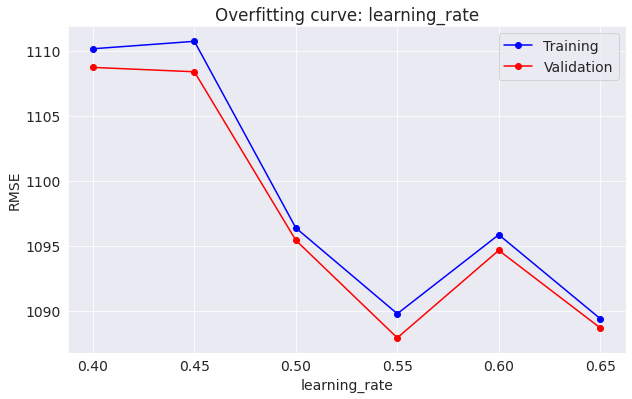

In [ ]:
xgbm_test_param_and_plot('learning_rate',list(np.arange(0.40,0.7,0.05)))

In [ ]:
xgbm_test_param_and_plot('subsample',list(np.arange(1,0.1,-0.1)))

cycle is started
[06:55:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:56:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:57:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:59:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[07:00:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[07:01:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:square

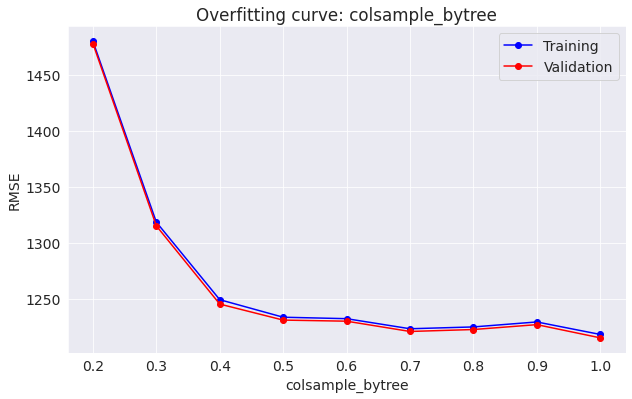

In [ ]:
xgbm_test_param_and_plot('colsample_bytree',list(np.arange(1,0.1,-0.1)))

In [ ]:
xgbm_params = {'max_depth': [13,15,17],
               #'n_estimators': [100,500],
               'learning_rate': [0.55,0.6,0.65],
               'subsample': [0.2,0.7,1.0],
               'colsample_bytree' : [0.7,0.9,1.0]
}

In [ ]:
XGBM_tree = XGBRegressor(random_state=42,n_jobs=-1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rscv_XGBM_model = RandomizedSearchCV(estimator = XGBM_tree,
                                      param_distributions=xgbm_params,
                                      n_iter=10,
                                      cv=3,
                                      verbose=2)

In [ ]:
rscv_XGBM_model.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[07:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, learning_rate=0.55, max_depth=15, subsample=0.7; total time= 4.1min
[07:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, learning_rate=0.55, max_depth=15, subsample=0.7; total time= 4.1min
[07:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, learning_rate=0.55, max_depth=15, subsample=0.7; total time= 4.1min
[07:15:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, learning_rate=0.55, max_depth=15, subsample=0.2; total time= 3.3min
[07:18:33] WARNING: /workspace/src/

RandomizedSearchCV(cv=3, estimator=XGBRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'colsample_bytree': [0.7, 0.9, 1.0],
                                        'learning_rate': [0.55, 0.6, 0.65],
                                        'max_depth': [13, 15, 17],
                                        'subsample': [0.2, 0.7, 1.0]},
                   verbose=2)

In [ ]:
rscv_XGBM_model.best_score_

0.9261693027325685

In [ ]:
rscv_XGBM_model.best_params_

{'subsample': 1.0,
 'max_depth': 15,
 'learning_rate': 0.6,
 'colsample_bytree': 0.7}

In [ ]:
XGB_best_params = {'subsample': 1.0,
 'max_depth': 15,
 'learning_rate': 0.6,
 'colsample_bytree': 0.7,
 'random_state' : 42,
 'n_estimators' : 1000,
 'n_jobs' : -1
 }

In [ ]:
%%time
Xgb_best,Xgb_best_train_metrics,Xgb_best_val_metrics = try_model(XGBRegressor,**XGB_best_params)

[07:38:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Training set metrics are :dict_items([('RMSE', 0.14039338570064996), ('R2 Score', 0.9999999978791428), ('RMSPE', 3.021450206135129e-05)])
The Validation set metrics are :dict_items([('RMSE', 790.0247693005206), ('R2 Score', 0.9326965737848081), ('RMSPE', 0.13600659416646496)])
CPU times: user 1h 51min 47s, sys: 7.33 s, total: 1h 51min 54s
Wall time: 57min 51s


In [ ]:
joblib.dump(Xgb_best, 'Xgb-best-model.joblib')

['Xgb-best-model.joblib']

In [ ]:
Xgb_best = joblib.load('Xgb-best-model.joblib')

## Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
input_estimators = [
    ('lgbm' , lgbm_best),
    ('Dtree', Dtree_best)
]

In [ ]:
%%time
stack_model = StackingRegressor(estimators=input_estimators,final_estimator=lgb.LGBMRegressor(random_state=42,n_jobs=-1))
stack_model.fit(X_train,y_train.values.ravel())

CPU times: user 10min 1s, sys: 2.31 s, total: 10min 3s
Wall time: 5min 27s


StackingRegressor(estimators=[('lgbm',
                               LGBMRegressor(learning_rate=0.5, max_depth=10,
                                             n_estimators=1500, num_leaves=35,
                                             random_state=42)),
                              ('Dtree',
                               DecisionTreeRegressor(max_depth=18,
                                                     max_features=17,
                                                     max_leaf_nodes=8500,
                                                     min_impurity_decrease=0.15,
                                                     min_samples_leaf=9,
                                                     min_samples_split=3,
                                                     random_state=42))],
                  final_estimator=LGBMRegressor(random_state=42))

In [ ]:
y_train_preds = stack_model.predict(X_train)
y_val_preds = stack_model.predict(X_val)

In [ ]:
train_metrics = metrics(y_train, y_train_preds)
val_metrics = metrics(y_val, y_val_preds)
print(f"The Training set metrics are :{train_metrics.items()}")
print(f"The Validation set metrics are :{val_metrics.items()}")

The Training set metrics are :dict_items([('RMSE', 566.9635813676692), ('R2 Score', 0.9654117618348835), ('RMSPE', 0.168540514620572)])
The Validation set metrics are :dict_items([('RMSE', 660.2640992607139), ('R2 Score', 0.9529899053391626), ('RMSPE', 0.11745683637464215)])


In [ ]:
joblib.dump(stack_model, 'stack_model.joblib')


['stack_model.joblib']

In [ ]:
stack_model = joblib.load('stack_model.joblib')

## Feature importance and Submission

In [ ]:
test_inputs = pd.read_parquet("test_inputs.parquet")
store_close_filt = pd.read_csv("test_close_filt.csv",index_col=["Id"])
def make_submission_file(model,file_name):
    submission_df = pd.read_csv("./rossmann-store-sales/sample_submission.csv",index_col=["Id"])
    y_test_preds = model.predict(test_inputs)
    submission_df["Sales"] = y_test_preds
    submission_df[store_close_filt["Open"]] = 0
    submission_df.to_csv(f"{file_name}.csv")
    return f"{file_name}.csv is created."

Descision Tree Final Submission

In [ ]:
Dtree_best

DecisionTreeRegressor(max_depth=18, max_features=17, max_leaf_nodes=8500,
                      min_impurity_decrease=0.15, min_samples_leaf=9,
                      min_samples_split=3, random_state=42)

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'Descision_tree': Dtree_best.feature_importances_
})

In [ ]:
make_submission_file(Dtree_best,"Descision-Tree-submission")

'Descision-Tree-submission.csv is created.'

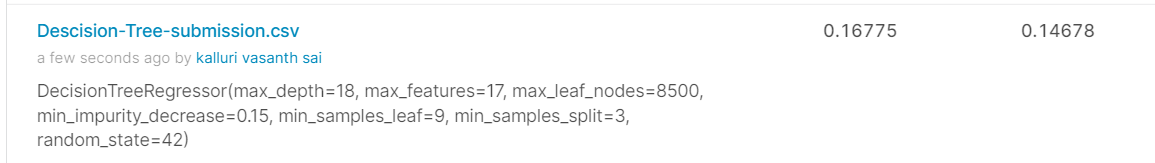

In [ ]:
Dtree_test_RMPSE = 0.16775

Random Forest Regressor Submission

In [ ]:
RFR_best

RandomForestRegressor(max_features=0.5, min_samples_split=3, n_estimators=250,
                      n_jobs=-1, random_state=42)

In [ ]:
importance_df["Random-Forest"] = RFR_best.feature_importances_

In [ ]:
make_submission_file(RFR_best,"Random-Forest-submission")

'Random-Forest-submission.csv is created.'

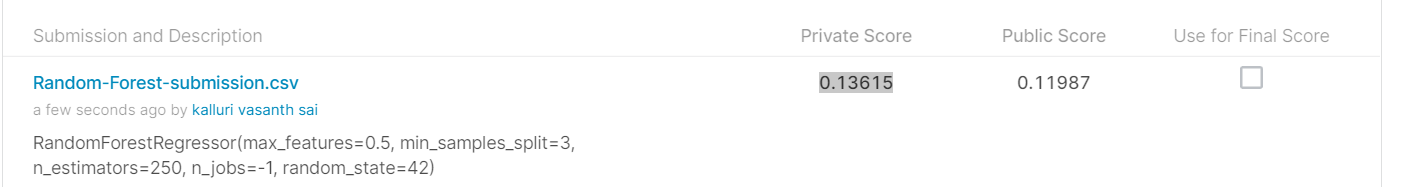

In [ ]:
RFR_test_RMPSE = 0.13615

LGBM Submission

In [ ]:
lgbm_best

LGBMRegressor(learning_rate=0.5, max_depth=10, n_estimators=1500, num_leaves=35,
              random_state=42)

In [ ]:
importance_df["Light-GBM"] = lgbm_best.feature_importances_

In [ ]:
make_submission_file(lgbm_best,"Light-GBM-submission")

'Light-GBM-submission.csv is created.'

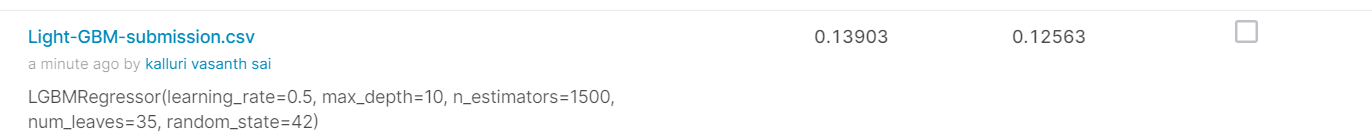

In [ ]:
lgbm_test_RMPSE = 0.13903

XG Boost Submission

In [ ]:
Xgb_best

XGBRegressor(colsample_bytree=0.7, learning_rate=0.6, max_depth=15,
             n_estimators=1000, n_jobs=-1, random_state=42, subsample=1.0)

In [ ]:
importance_df["XG-boost"] =  Xgb_best.feature_importances_

In [ ]:
make_submission_file(Xgb_best,"XG-Boost-submission")

'XG-Boost-submission.csv is created.'

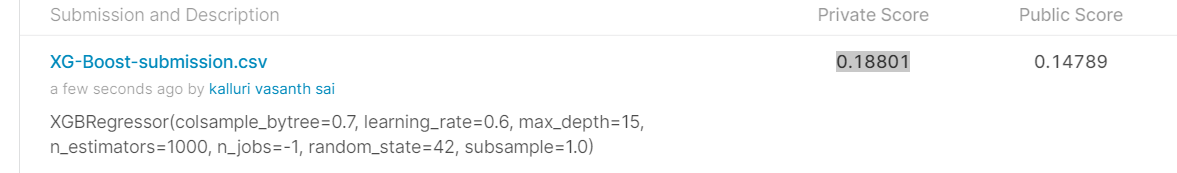


In [ ]:
Xgb_test_RMPSE = 0.18801

Stacked Model Submission

In [ ]:
stack_model

StackingRegressor(estimators=[('lgbm',
                               LGBMRegressor(learning_rate=0.5, max_depth=10,
                                             n_estimators=1500, num_leaves=35,
                                             random_state=42)),
                              ('Dtree',
                               DecisionTreeRegressor(max_depth=18,
                                                     max_features=17,
                                                     max_leaf_nodes=8500,
                                                     min_impurity_decrease=0.15,
                                                     min_samples_leaf=9,
                                                     min_samples_split=3,
                                                     random_state=42))],
                  final_estimator=LGBMRegressor(random_state=42))

In [ ]:
make_submission_file(stack_model,"stack-model-submission")

'stack-model-submission.csv is created.'


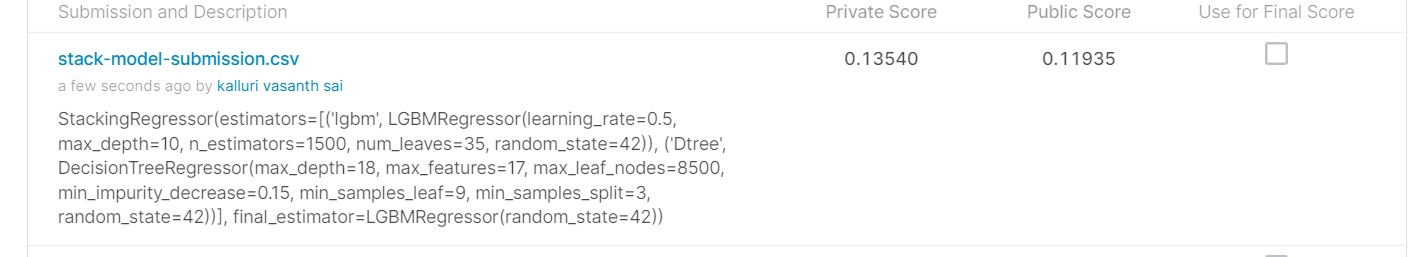


In [ ]:
stack_model_test_RMSPE = 0.13540

- Feature Importance

In [ ]:
importance_df

,feature,Descision_tree,Random-Forest,Light-GBM,XG-Boost
0,Store,0.008772,0.017219,5706,0.002978
1,CompetitionDistance,0.012439,0.025017,5594,0.009011
2,CompetitionOpen,0.006315,0.017744,5756,0.004101
3,Day,0.025313,0.040506,5853,0.020414
4,Month,0.020877,0.019221,2285,0.003727
5,WeekOfYear,0.022857,0.034402,4221,0.039130
6,Promo2,0.008775,0.003530,426,0.008906
7,Avg_sales_per_day,0.665572,0.605252,6552,0.270212
8,Promo2Open,0.004087,0.012505,4348,0.004128
9,Promo,0.154494,0.138866,1841,0.018926


In [ ]:
importance_df.to_parquet("importance-df.parquet")

In [ ]:
importance_df = pd.read_parquet("importance-df.parquet")

### commit

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="rossman-sales-prediction")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
